In [1]:
import json
import os
import math
import pickle

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

import numpy as np
import pandas as pd

from collections import Counter
from collections import defaultdict

from scipy import stats
from scipy.stats import ranksums

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdChemReactions
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

In [2]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

# Calculate molecule similarity


In [3]:
# Download molecular structures of reaction participants from Rhea database (https://www.rhea-db.org/)
# The results may be slightly different according to the version of Rhea data you used

!wget https://ftp.expasy.org/databases/rhea/ctfiles/rhea-mol.tar.gz 

In [4]:
! tar -xzvf rhea-mol.tar.gz

x mol/
x mol/CHEBI_36167.mol
x mol/CHEBI_137950.mol
x mol/CHEBI_139598.mol
x mol/CHEBI_60365.mol
x mol/CHEBI_137598.mol
x mol/CHEBI_136422.mol
x mol/CHEBI_150859.mol
x mol/CHEBI_17970.mol
x mol/CHEBI_57801.mol
x mol/CHEBI_139278.mol
x mol/CHEBI_58290.mol
x mol/CHEBI_91011.mol
x mol/CHEBI_140525.mol
x mol/CHEBI_142610.mol
x mol/CHEBI_65070.mol
x mol/CHEBI_33277.mol
x mol/CHEBI_50661.mol
x mol/CHEBI_72722.mol
x mol/CHEBI_35341.mol
x mol/CHEBI_133974.mol
x mol/CHEBI_58230.mol
x mol/CHEBI_57903.mol
x mol/CHEBI_16040.mol
x mol/CHEBI_142235.mol
x mol/CHEBI_83360.mol
x mol/CHEBI_50169.mol
x mol/CHEBI_58387.mol
x mol/CHEBI_58619.mol
x mol/CHEBI_16659.mol
x mol/CHEBI_81981.mol
x mol/CHEBI_180899.mol
x mol/CHEBI_76944.mol
x mol/CHEBI_57830.mol
x mol/CHEBI_75935.mol
x mol/CHEBI_12834.mol
x mol/CHEBI_68649.mol
x mol/CHEBI_83905.mol
x mol/CHEBI_90481.mol
x mol/CHEBI_58628.mol
x mol/CHEBI_74083.mol
x mol/CHEBI_37448.mol
x mol/CHEBI_85335.mol
x mol/CHEBI_86963.mol
x mol/CHEBI_16482.mol
x mol/CHEBI_76

x mol/CHEBI_84169.mol
x mol/CHEBI_73943.mol
x mol/CHEBI_57774.mol
x mol/CHEBI_57848.mol
x mol/CHEBI_78461.mol
x mol/CHEBI_17670.mol
x mol/CHEBI_137982.mol
x mol/CHEBI_70786.mol
x mol/CHEBI_17828.mol
x mol/CHEBI_60129.mol
x mol/CHEBI_139559.mol
x mol/CHEBI_142288.mol
x mol/CHEBI_30803.mol
x mol/CHEBI_133898.mol
x mol/CHEBI_83439.mol
x mol/CHEBI_58115.mol
x mol/CHEBI_144068.mol
x mol/CHEBI_57647.mol
x mol/CHEBI_64234.mol
x mol/CHEBI_134616.mol
x mol/CHEBI_90493.mol
x mol/CHEBI_28788.mol
x mol/CHEBI_85351.mol
x mol/CHEBI_28433.mol
x mol/CHEBI_47908.mol
x mol/CHEBI_57479.mol
x mol/CHEBI_90800.mol
x mol/CHEBI_70784.mol
x mol/CHEBI_49017.mol
x mol/CHEBI_145399.mol
x mol/CHEBI_67135.mol
x mol/CHEBI_67263.mol
x mol/CHEBI_137010.mol
x mol/CHEBI_189848.mol
x mol/CHEBI_136492.mol
x mol/CHEBI_58116.mol
x mol/CHEBI_84672.mol
x mol/CHEBI_62338.mol
x mol/CHEBI_77694.mol
x mol/CHEBI_84973.mol
x mol/CHEBI_51833.mol
x mol/CHEBI_28206.mol
x mol/CHEBI_188995.mol
x mol/CHEBI_169973.mol
x mol/CHEBI_74506.mo

x mol/CHEBI_141047.mol
x mol/CHEBI_77494.mol
x mol/CHEBI_167472.mol
x mol/CHEBI_58870.mol
x mol/CHEBI_356010.mol
x mol/CHEBI_50283.mol
x mol/CHEBI_35177.mol
x mol/CHEBI_90119.mol
x mol/CHEBI_136765.mol
x mol/CHEBI_17540.mol
x mol/CHEBI_90732.mol
x mol/CHEBI_685.mol
x mol/CHEBI_58101.mol
x mol/CHEBI_140275.mol
x mol/CHEBI_144373.mol
x mol/CHEBI_10979.mol
x mol/CHEBI_85097.mol
x mol/CHEBI_47799.mol
x mol/CHEBI_74552.mol
x mol/CHEBI_63244.mol
x mol/CHEBI_136716.mol
x mol/CHEBI_137061.mol
x mol/CHEBI_28115.mol
x mol/CHEBI_167912.mol
x mol/CHEBI_176590.mol
x mol/CHEBI_146289.mol
x mol/CHEBI_55331.mol
x mol/CHEBI_58550.mol
x mol/CHEBI_138175.mol
x mol/CHEBI_167464.mol
x mol/CHEBI_88069.mol
x mol/CHEBI_128753.mol
x mol/CHEBI_43711.mol
x mol/CHEBI_90968.mol
x mol/CHEBI_64841.mol
x mol/CHEBI_145803.mol
x mol/CHEBI_90813.mol
x mol/CHEBI_166827.mol
x mol/CHEBI_84182.mol
x mol/CHEBI_17332.mol
x mol/CHEBI_140635.mol
x mol/CHEBI_138142.mol
x mol/CHEBI_58257.mol
x mol/CHEBI_17168.mol
x mol/CHEBI_5831

x mol/CHEBI_76456.mol
x mol/CHEBI_60388.mol
x mol/CHEBI_57291.mol
x mol/CHEBI_17104.mol
x mol/CHEBI_77037.mol
x mol/CHEBI_22801.mol
x mol/CHEBI_167128.mol
x mol/CHEBI_17362.mol
x mol/CHEBI_166867.mol
x mol/CHEBI_32888.mol
x mol/CHEBI_78516.mol
x mol/CHEBI_75220.mol
x mol/CHEBI_84728.mol
x mol/CHEBI_137886.mol
x mol/CHEBI_57746.mol
x mol/POLYMER_9550.mol
x mol/CHEBI_16199.mol
x mol/CHEBI_83142.mol
x mol/CHEBI_18185.mol
x mol/CHEBI_137523.mol
x mol/CHEBI_58882.mol
x mol/CHEBI_141995.mol
x mol/CHEBI_87747.mol
x mol/CHEBI_189002.mol
x mol/CHEBI_78338.mol
x mol/CHEBI_77351.mol
x mol/CHEBI_77386.mol
x mol/CHEBI_58680.mol
x mol/CHEBI_37563.mol
x mol/CHEBI_90616.mol
x mol/CHEBI_83350.mol
x mol/CHEBI_537519.mol
x mol/CHEBI_71395.mol
x mol/CHEBI_143779.mol
x mol/CHEBI_77848.mol
x mol/CHEBI_17069.mol
x mol/POLYMER_13733.mol
x mol/CHEBI_57762.mol
x mol/CHEBI_60386.mol
x mol/CHEBI_29650.mol
x mol/CHEBI_57721.mol
x mol/CHEBI_76502.mol
x mol/CHEBI_83861.mol
x mol/CHEBI_156530.mol
x mol/CHEBI_67026.mo

x mol/CHEBI_65069.mol
x mol/CHEBI_83226.mol
x mol/CHEBI_183056.mol
x mol/CHEBI_58913.mol
x mol/CHEBI_16709.mol
x mol/CHEBI_147365.mol
x mol/CHEBI_60110.mol
x mol/CHEBI_27603.mol
x mol/CHEBI_140650.mol
x mol/CHEBI_29020.mol
x mol/CHEBI_138041.mol
x mol/CHEBI_86146.mol
x mol/CHEBI_177904.mol
x mol/CHEBI_79072.mol
x mol/CHEBI_140303.mol
x mol/CHEBI_137594.mol
x mol/CHEBI_137824.mol
x mol/CHEBI_139498.mol
x mol/CHEBI_83388.mol
x mol/CHEBI_15740.mol
x mol/CHEBI_49257.mol
x mol/CHEBI_58488.mol
x mol/CHEBI_17169.mol
x mol/POLYMER_14296.mol
x mol/CHEBI_52026.mol
x mol/CHEBI_71984.mol
x mol/CHEBI_58458.mol
x mol/CHEBI_69023.mol
x mol/CHEBI_77767.mol
x mol/CHEBI_137933.mol
x mol/CHEBI_61721.mol
x mol/CHEBI_147382.mol
x mol/CHEBI_149499.mol
x mol/CHEBI_76360.mol
x mol/CHEBI_77163.mol
x mol/CHEBI_188996.mol
x mol/CHEBI_140664.mol
x mol/CHEBI_167149.mol
x mol/CHEBI_58336.mol
x mol/CHEBI_57681.mol
x mol/CHEBI_189646.mol
x mol/CHEBI_17607.mol
x mol/CHEBI_61997.mol
x mol/CHEBI_136763.mol
x mol/CHEBI_1

x mol/CHEBI_131981.mol
x mol/CHEBI_74335.mol
x mol/CHEBI_90874.mol
x mol/CHEBI_74578.mol
x mol/CHEBI_141453.mol
x mol/CHEBI_30934.mol
x mol/CHEBI_87701.mol
x mol/CHEBI_74071.mol
x mol/CHEBI_138284.mol
x mol/CHEBI_142534.mol
x mol/CHEBI_144377.mol
x mol/CHEBI_146021.mol
x mol/CHEBI_19333.mol
x mol/CHEBI_77887.mol
x mol/CHEBI_85174.mol
x mol/CHEBI_143224.mol
x mol/CHEBI_74691.mol
x mol/CHEBI_76842.mol
x mol/CHEBI_74328.mol
x mol/CHEBI_77133.mol
x mol/CHEBI_172396.mol
x mol/CHEBI_16220.mol
x mol/CHEBI_134186.mol
x mol/CHEBI_59791.mol
x mol/CHEBI_16985.mol
x mol/CHEBI_64815.mol
x mol/CHEBI_136974.mol
x mol/CHEBI_27938.mol
x mol/CHEBI_138637.mol
x mol/CHEBI_17826.mol
x mol/CHEBI_74230.mol
x mol/CHEBI_155857.mol
x mol/CHEBI_74692.mol
x mol/CHEBI_176972.mol
x mol/CHEBI_29010.mol
x mol/CHEBI_136742.mol
x mol/CHEBI_58808.mol
x mol/CHEBI_77086.mol
x mol/CHEBI_78294.mol
x mol/CHEBI_87792.mol
x mol/CHEBI_144429.mol
x mol/POLYMER_9561.mol
x mol/CHEBI_144781.mol
x mol/CHEBI_138442.mol
x mol/CHEBI_16

x mol/CHEBI_68645.mol
x mol/CHEBI_75932.mol
x mol/CHEBI_73534.mol
x mol/CHEBI_134352.mol
x mol/CHEBI_77825.mol
x mol/CHEBI_16688.mol
x mol/CHEBI_47961.mol
x mol/CHEBI_87054.mol
x mol/CHEBI_77076.mol
x mol/CHEBI_82881.mol
x mol/CHEBI_79008.mol
x mol/CHEBI_62616.mol
x mol/CHEBI_145434.mol
x mol/CHEBI_18285.mol
x mol/CHEBI_76297.mol
x mol/CHEBI_52392.mol
x mol/CHEBI_143547.mol
x mol/CHEBI_134212.mol
x mol/CHEBI_147421.mol
x mol/CHEBI_183063.mol
x mol/CHEBI_81481.mol
x mol/CHEBI_74902.mol
x mol/CHEBI_57456.mol
x mol/CHEBI_957.mol
x mol/CHEBI_87678.mol
x mol/CHEBI_15677.mol
x mol/CHEBI_75465.mol
x mol/CHEBI_132005.mol
x mol/CHEBI_17987.mol
x mol/CHEBI_59505.mol
x mol/CHEBI_86464.mol
x mol/CHEBI_57886.mol
x mol/CHEBI_57743.mol
x mol/CHEBI_58815.mol
x mol/CHEBI_145938.mol
x mol/CHEBI_74475.mol
x mol/CHEBI_57300.mol
x mol/CHEBI_75824.mol
x mol/CHEBI_86999.mol
x mol/CHEBI_131651.mol
x mol/CHEBI_86040.mol
x mol/CHEBI_59971.mol
x mol/CHEBI_78458.mol
x mol/CHEBI_86019.mol
x mol/CHEBI_88370.mol
x m

x mol/CHEBI_136523.mol
x mol/CHEBI_84355.mol
x mol/CHEBI_48946.mol
x mol/CHEBI_145806.mol
x mol/CHEBI_142597.mol
x mol/CHEBI_58059.mol
x mol/CHEBI_142928.mol
x mol/CHEBI_78533.mol
x mol/CHEBI_74143.mol
x mol/CHEBI_86236.mol
x mol/CHEBI_76428.mol
x mol/CHEBI_133929.mol
x mol/CHEBI_85635.mol
x mol/CHEBI_188357.mol
x mol/CHEBI_78981.mol
x mol/CHEBI_77681.mol
x mol/CHEBI_75612.mol
x mol/CHEBI_143198.mol
x mol/CHEBI_149734.mol
x mol/CHEBI_57703.mol
x mol/CHEBI_134681.mol
x mol/CHEBI_139611.mol
x mol/CHEBI_141495.mol
x mol/CHEBI_78469.mol
x mol/CHEBI_77677.mol
x mol/CHEBI_57301.mol
x mol/CHEBI_59895.mol
x mol/CHEBI_131912.mol
x mol/CHEBI_87163.mol
x mol/CHEBI_132218.mol
x mol/CHEBI_75547.mol
x mol/CHEBI_85778.mol
x mol/CHEBI_18135.mol
x mol/CHEBI_136661.mol
x mol/CHEBI_58557.mol
x mol/CHEBI_88167.mol
x mol/CHEBI_156326.mol
x mol/CHEBI_63180.mol
x mol/CHEBI_155860.mol
x mol/CHEBI_16879.mol
x mol/CHEBI_76168.mol
x mol/CHEBI_58548.mol
x mol/CHEBI_35331.mol
x mol/CHEBI_134033.mol
x mol/CHEBI_156

x mol/CHEBI_57907.mol
x mol/CHEBI_82744.mol
x mol/CHEBI_177878.mol
x mol/CHEBI_141603.mol
x mol/CHEBI_35236.mol
x mol/CHEBI_16295.mol
x mol/CHEBI_50387.mol
x mol/CHEBI_167191.mol
x mol/CHEBI_58727.mol
x mol/CHEBI_64572.mol
x mol/CHEBI_17447.mol
x mol/CHEBI_84142.mol
x mol/CHEBI_73543.mol
x mol/CHEBI_142526.mol
x mol/CHEBI_142863.mol
x mol/CHEBI_16471.mol
x mol/CHEBI_76387.mol
x mol/CHEBI_1107.mol
x mol/CHEBI_66470.mol
x mol/CHEBI_59899.mol
x mol/CHEBI_62047.mol
x mol/CHEBI_2150.mol
x mol/CHEBI_137563.mol
x mol/CHEBI_141573.mol
x mol/CHEBI_15724.mol
x mol/CHEBI_144927.mol
x mol/CHEBI_133309.mol
x mol/CHEBI_75231.mol
x mol/CHEBI_61708.mol
x mol/CHEBI_58768.mol
x mol/CHEBI_142600.mol
x mol/CHEBI_84813.mol
x mol/CHEBI_147351.mol
x mol/CHEBI_64982.mol
x mol/CHEBI_63796.mol
x mol/CHEBI_167490.mol
x mol/CHEBI_13197.mol
x mol/CHEBI_57429.mol
x mol/CHEBI_57859.mol
x mol/CHEBI_157661.mol
x mol/CHEBI_18394.mol
x mol/CHEBI_27732.mol
x mol/CHEBI_64837.mol
x mol/CHEBI_143129.mol
x mol/CHEBI_58037.mo

x mol/CHEBI_32879.mol
x mol/CHEBI_142282.mol
x mol/CHEBI_145821.mol
x mol/CHEBI_17802.mol
x mol/CHEBI_78551.mol
x mol/CHEBI_57305.mol
x mol/CHEBI_167096.mol
x mol/CHEBI_58774.mol
x mol/CHEBI_27590.mol
x mol/CHEBI_58919.mol
x mol/CHEBI_49214.mol
x mol/CHEBI_48981.mol
x mol/CHEBI_58750.mol
x mol/CHEBI_57634.mol
x mol/CHEBI_61678.mol
x mol/CHEBI_149628.mol
x mol/CHEBI_75629.mol
x mol/CHEBI_77226.mol
x mol/CHEBI_84996.mol
x mol/POLYMER_15675.mol
x mol/CHEBI_142454.mol
x mol/CHEBI_78254.mol
x mol/CHEBI_63467.mol
x mol/CHEBI_58778.mol
x mol/CHEBI_15418.mol
x mol/CHEBI_75057.mol
x mol/CHEBI_57799.mol
x mol/CHEBI_80024.mol
x mol/CHEBI_142404.mol
x mol/CHEBI_58386.mol
x mol/CHEBI_58685.mol
x mol/CHEBI_76592.mol
x mol/CHEBI_131980.mol
x mol/CHEBI_41837.mol
x mol/CHEBI_16072.mol
x mol/CHEBI_16698.mol
x mol/CHEBI_90885.mol
x mol/CHEBI_58682.mol
x mol/CHEBI_77167.mol
x mol/CHEBI_88240.mol
x mol/CHEBI_18138.mol
x mol/CHEBI_62600.mol
x mol/CHEBI_23733.mol
x mol/CHEBI_9053.mol
x mol/CHEBI_136330.mol
x

x mol/CHEBI_76305.mol
x mol/CHEBI_142837.mol
x mol/CHEBI_131971.mol
x mol/CHEBI_76264.mol
x mol/CHEBI_77755.mol
x mol/CHEBI_145652.mol
x mol/CHEBI_58764.mol
x mol/CHEBI_137521.mol
x mol/CHEBI_75116.mol
x mol/CHEBI_136902.mol
x mol/CHEBI_31013.mol
x mol/CHEBI_3686.mol
x mol/CHEBI_58462.mol
x mol/CHEBI_64723.mol
x mol/CHEBI_76366.mol
x mol/CHEBI_91300.mol
x mol/CHEBI_136841.mol
x mol/CHEBI_167445.mol
x mol/CHEBI_65094.mol
x mol/CHEBI_140203.mol
x mol/CHEBI_16562.mol
x mol/CHEBI_150015.mol
x mol/CHEBI_137955.mol
x mol/CHEBI_88351.mol
x mol/CHEBI_36498.mol
x mol/CHEBI_64976.mol
x mol/CHEBI_142959.mol
x mol/CHEBI_64353.mol
x mol/CHEBI_145011.mol
x mol/CHEBI_78934.mol
x mol/CHEBI_70989.mol
x mol/CHEBI_78313.mol
x mol/CHEBI_84789.mol
x mol/CHEBI_144438.mol
x mol/CHEBI_60903.mol
x mol/CHEBI_144926.mol
x mol/CHEBI_77297.mol
x mol/CHEBI_146008.mol
x mol/CHEBI_87598.mol
x mol/CHEBI_189583.mol
x mol/CHEBI_143256.mol
x mol/CHEBI_83783.mol
x mol/CHEBI_58079.mol
x mol/CHEBI_72831.mol
x mol/CHEBI_1447

x mol/CHEBI_75608.mol
x mol/CHEBI_84900.mol
x mol/CHEBI_18403.mol
x mol/CHEBI_17473.mol
x mol/CHEBI_29461.mol
x mol/CHEBI_80029.mol
x mol/CHEBI_78328.mol
x mol/CHEBI_73674.mol
x mol/CHEBI_138623.mol
x mol/CHEBI_134389.mol
x mol/CHEBI_87002.mol
x mol/CHEBI_143162.mol
x mol/CHEBI_74497.mol
x mol/CHEBI_62444.mol
x mol/CHEBI_61679.mol
x mol/CHEBI_145398.mol
x mol/CHEBI_131935.mol
x mol/CHEBI_136810.mol
x mol/CHEBI_84760.mol
x mol/CHEBI_45863.mol
x mol/CHEBI_60904.mol
x mol/POLYMER_9603.mol
x mol/CHEBI_33308.mol
x mol/POLYMER_14060.mol
x mol/CHEBI_48939.mol
x mol/CHEBI_87373.mol
x mol/CHEBI_76839.mol
x mol/CHEBI_144482.mol
x mol/CHEBI_27493.mol
x mol/CHEBI_17703.mol
x mol/CHEBI_75936.mol
x mol/CHEBI_57475.mol
x mol/CHEBI_142516.mol
x mol/CHEBI_16907.mol
x mol/CHEBI_136302.mol
x mol/CHEBI_134671.mol
x mol/CHEBI_90696.mol
x mol/CHEBI_62649.mol
x mol/CHEBI_72829.mol
x mol/CHEBI_27576.mol
x mol/CHEBI_57460.mol
x mol/CHEBI_138222.mol
x mol/CHEBI_132072.mol
x mol/CHEBI_58321.mol
x mol/CHEBI_58878

x mol/CHEBI_62236.mol
x mol/CHEBI_76461.mol
x mol/CHEBI_17878.mol
x mol/CHEBI_60784.mol
x mol/CHEBI_83358.mol
x mol/CHEBI_49263.mol
x mol/CHEBI_136714.mol
x mol/CHEBI_136596.mol
x mol/CHEBI_16799.mol
x mol/CHEBI_78673.mol
x mol/CHEBI_59776.mol
x mol/CHEBI_77272.mol
x mol/CHEBI_34597.mol
x mol/CHEBI_73387.mol
x mol/CHEBI_90812.mol
x mol/CHEBI_57891.mol
x mol/POLYMER_11882.mol
x mol/CHEBI_61983.mol
x mol/CHEBI_44951.mol
x mol/CHEBI_17602.mol
x mol/CHEBI_58660.mol
x mol/CHEBI_90164.mol
x mol/CHEBI_183093.mol
x mol/CHEBI_1235.mol
x mol/CHEBI_83248.mol
x mol/CHEBI_136524.mol
x mol/CHEBI_52442.mol
x mol/CHEBI_183087.mol
x mol/POLYMER_14257.mol
x mol/CHEBI_141576.mol
x mol/CHEBI_15733.mol
x mol/CHEBI_85417.mol
x mol/CHEBI_145540.mol
x mol/CHEBI_80729.mol
x mol/CHEBI_47622.mol
x mol/CHEBI_64998.mol
x mol/CHEBI_59990.mol
x mol/CHEBI_145986.mol
x mol/CHEBI_177301.mol
x mol/CHEBI_157649.mol
x mol/CHEBI_180544.mol
x mol/CHEBI_61429.mol
x mol/POLYMER_9528.mol
x mol/CHEBI_132139.mol
x mol/CHEBI_3534

x mol/CHEBI_76978.mol
x mol/CHEBI_143877.mol
x mol/CHEBI_87828.mol
x mol/CHEBI_144969.mol
x mol/CHEBI_136625.mol
x mol/CHEBI_62448.mol
x mol/CHEBI_90578.mol
x mol/CHEBI_763.mol
x mol/CHEBI_62418.mol
x mol/CHEBI_53155.mol
x mol/CHEBI_55376.mol
x mol/CHEBI_16540.mol
x mol/CHEBI_136416.mol
x mol/CHEBI_77812.mol
x mol/CHEBI_139573.mol
x mol/POLYMER_11267.mol
x mol/CHEBI_133242.mol
x mol/CHEBI_76440.mol
x mol/CHEBI_82961.mol
x mol/CHEBI_15930.mol
x mol/CHEBI_84235.mol
x mol/CHEBI_23872.mol
x mol/CHEBI_155913.mol
x mol/CHEBI_37720.mol
x mol/CHEBI_78343.mol
x mol/CHEBI_167324.mol
x mol/CHEBI_16959.mol
x mol/CHEBI_167675.mol
x mol/CHEBI_79068.mol
x mol/CHEBI_57753.mol
x mol/CHEBI_137731.mol
x mol/CHEBI_85294.mol
x mol/CHEBI_57679.mol
x mol/CHEBI_74565.mol
x mol/CHEBI_58276.mol
x mol/CHEBI_52267.mol
x mol/CHEBI_137662.mol
x mol/CHEBI_16782.mol
x mol/CHEBI_29973.mol
x mol/CHEBI_167545.mol
x mol/CHEBI_63458.mol
x mol/CHEBI_137487.mol
x mol/CHEBI_187874.mol
x mol/CHEBI_58665.mol
x mol/CHEBI_17681.

x mol/CHEBI_76421.mol
x mol/CHEBI_143194.mol
x mol/CHEBI_30043.mol
x mol/CHEBI_143794.mol
x mol/CHEBI_59458.mol
x mol/CHEBI_178033.mol
x mol/CHEBI_10036.mol
x mol/CHEBI_58297.mol
x mol/CHEBI_71315.mol
x mol/CHEBI_68493.mol
x mol/CHEBI_85471.mol
x mol/CHEBI_17977.mol
x mol/CHEBI_62899.mol
x mol/CHEBI_88244.mol
x mol/CHEBI_15349.mol
x mol/CHEBI_64894.mol
x mol/CHEBI_13172.mol
x mol/CHEBI_72745.mol
x mol/CHEBI_17863.mol
x mol/CHEBI_141060.mol
x mol/CHEBI_17347.mol
x mol/CHEBI_63446.mol
x mol/CHEBI_142915.mol
x mol/CHEBI_167551.mol
x mol/CHEBI_58725.mol
x mol/CHEBI_133948.mol
x mol/CHEBI_18029.mol
x mol/CHEBI_131973.mol
x mol/CHEBI_177918.mol
x mol/CHEBI_84025.mol
x mol/CHEBI_59910.mol
x mol/CHEBI_10357.mol
x mol/CHEBI_167907.mol
x mol/CHEBI_85375.mol
x mol/CHEBI_169975.mol
x mol/CHEBI_57283.mol
x mol/CHEBI_57367.mol
x mol/CHEBI_63307.mol
x mol/CHEBI_188356.mol
x mol/CHEBI_64861.mol
x mol/CHEBI_87089.mol
x mol/CHEBI_77772.mol
x mol/CHEBI_61527.mol
x mol/CHEBI_78286.mol
x mol/CHEBI_16301.mo

x mol/CHEBI_83724.mol
x mol/CHEBI_57843.mol
x mol/CHEBI_3378.mol
x mol/CHEBI_57772.mol
x mol/CHEBI_145746.mol
x mol/CHEBI_63559.mol
x mol/CHEBI_16753.mol
x mol/CHEBI_87305.mol
x mol/CHEBI_169946.mol
x mol/CHEBI_10980.mol
x mol/CHEBI_76506.mol
x mol/CHEBI_136990.mol
x mol/CHEBI_74390.mol
x mol/CHEBI_141633.mol
x mol/CHEBI_141607.mol
x mol/CHEBI_87788.mol
x mol/CHEBI_76436.mol
x mol/POLYMER_12627.mol
x mol/CHEBI_87495.mol
x mol/CHEBI_58232.mol
x mol/CHEBI_142635.mol
x mol/CHEBI_138341.mol
x mol/CHEBI_144890.mol
x mol/CHEBI_90515.mol
x mol/CHEBI_42870.mol
x mol/CHEBI_58443.mol
x mol/CHEBI_86145.mol
x mol/CHEBI_16065.mol
x mol/CHEBI_63328.mol
x mol/CHEBI_78467.mol
x mol/CHEBI_57455.mol
x mol/CHEBI_83100.mol
x mol/CHEBI_60207.mol
x mol/CHEBI_30212.mol
x mol/CHEBI_139130.mol
x mol/CHEBI_32023.mol
x mol/CHEBI_16918.mol
x mol/CHEBI_62452.mol
x mol/CHEBI_57377.mol
x mol/CHEBI_74334.mol
x mol/CHEBI_144936.mol
x mol/CHEBI_63310.mol
x mol/CHEBI_48983.mol
x mol/CHEBI_75036.mol
x mol/CHEBI_133497.mo

x mol/CHEBI_58724.mol
x mol/CHEBI_46987.mol
x mol/CHEBI_61417.mol
x mol/CHEBI_82945.mol
x mol/CHEBI_19418.mol
x mol/CHEBI_57559.mol
x mol/CHEBI_67190.mol
x mol/CHEBI_89828.mol
x mol/CHEBI_169934.mol
x mol/CHEBI_58111.mol
x mol/CHEBI_137168.mol
x mol/CHEBI_18236.mol
x mol/CHEBI_171668.mol
x mol/CHEBI_71550.mol
x mol/POLYMER_13138.mol
x mol/CHEBI_31080.mol
x mol/CHEBI_83856.mol
x mol/CHEBI_60615.mol
x mol/CHEBI_57929.mol
x mol/CHEBI_58804.mol
x mol/CHEBI_16724.mol
x mol/CHEBI_58046.mol
x mol/CHEBI_75611.mol
x mol/CHEBI_45213.mol
x mol/CHEBI_139458.mol
x mol/CHEBI_58057.mol
x mol/CHEBI_57839.mol
x mol/CHEBI_76420.mol
x mol/CHEBI_143573.mol
x mol/CHEBI_57957.mol
x mol/CHEBI_183368.mol
x mol/CHEBI_77765.mol
x mol/CHEBI_52973.mol
x mol/CHEBI_78820.mol
x mol/CHEBI_75542.mol
x mol/CHEBI_66893.mol
x mol/CHEBI_17081.mol
x mol/CHEBI_60849.mol
x mol/CHEBI_58538.mol
x mol/CHEBI_85302.mol
x mol/CHEBI_71537.mol
x mol/CHEBI_143149.mol
x mol/CHEBI_60118.mol
x mol/CHEBI_17836.mol
x mol/CHEBI_184376.mol


x mol/CHEBI_58121.mol
x mol/CHEBI_155909.mol
x mol/CHEBI_75555.mol
x mol/CHEBI_137882.mol
x mol/CHEBI_76892.mol
x mol/CHEBI_138227.mol
x mol/CHEBI_133482.mol
x mol/CHEBI_28999.mol
x mol/CHEBI_138107.mol
x mol/CHEBI_58310.mol
x mol/CHEBI_63662.mol
x mol/CHEBI_155910.mol
x mol/CHEBI_138226.mol
x mol/CHEBI_17323.mol
x mol/CHEBI_177290.mol
x mol/CHEBI_64489.mol
x mol/CHEBI_180465.mol
x mol/CHEBI_57368.mol
x mol/CHEBI_77660.mol
x mol/CHEBI_76495.mol
x mol/CHEBI_58855.mol
x mol/CHEBI_59435.mol
x mol/CHEBI_136966.mol
x mol/CHEBI_16035.mol
x mol/CHEBI_18390.mol
x mol/CHEBI_77888.mol
x mol/CHEBI_72947.mol
x mol/CHEBI_90868.mol
x mol/POLYMER_13355.mol
x mol/CHEBI_49249.mol
x mol/CHEBI_150013.mol
x mol/CHEBI_77548.mol
x mol/CHEBI_17001.mol
x mol/CHEBI_143174.mol
x mol/CHEBI_143151.mol
x mol/CHEBI_76202.mol
x mol/CHEBI_84539.mol
x mol/CHEBI_139337.mol
x mol/POLYMER_17484.mol
x mol/CHEBI_28324.mol
x mol/CHEBI_83665.mol
x mol/CHEBI_183084.mol
x mol/CHEBI_144428.mol
x mol/CHEBI_78442.mol
x mol/CHEBI_

x mol/CHEBI_76226.mol
x mol/CHEBI_17221.mol
x mol/CHEBI_305790.mol
x mol/CHEBI_172877.mol
x mol/CHEBI_156310.mol
x mol/CHEBI_58005.mol
x mol/CHEBI_144865.mol
x mol/CHEBI_140576.mol
x mol/CHEBI_85547.mol
x mol/CHEBI_60490.mol
x mol/CHEBI_29614.mol
x mol/CHEBI_155837.mol
x mol/CHEBI_90856.mol
x mol/CHEBI_77786.mol
x mol/CHEBI_84824.mol
x mol/CHEBI_133732.mol
x mol/CHEBI_83257.mol
x mol/CHEBI_84027.mol
x mol/CHEBI_73110.mol
x mol/CHEBI_50235.mol
x mol/CHEBI_147396.mol
x mol/CHEBI_90359.mol
x mol/CHEBI_52640.mol
x mol/CHEBI_167448.mol
x mol/CHEBI_50063.mol
x mol/CHEBI_145550.mol
x mol/CHEBI_16481.mol
x mol/CHEBI_87695.mol
x mol/CHEBI_27571.mol
x mol/CHEBI_50256.mol
x mol/CHEBI_64997.mol
x mol/CHEBI_136766.mol
x mol/CHEBI_75879.mol
x mol/CHEBI_133393.mol
x mol/CHEBI_65003.mol
x mol/CHEBI_67143.mol
x mol/CHEBI_156538.mol
x mol/CHEBI_1617.mol
x mol/CHEBI_142286.mol
x mol/CHEBI_49181.mol
x mol/CHEBI_64940.mol
x mol/CHEBI_139051.mol
x mol/CHEBI_15989.mol
x mol/CHEBI_73679.mol
x mol/CHEBI_142604

x mol/CHEBI_142660.mol
x mol/CHEBI_58277.mol
x mol/CHEBI_20710.mol
x mol/CHEBI_51480.mol
x mol/CHEBI_64677.mol
x mol/CHEBI_142764.mol
x mol/CHEBI_50027.mol
x mol/CHEBI_58799.mol
x mol/CHEBI_58398.mol
x mol/CHEBI_142060.mol
x mol/CHEBI_60377.mol
x mol/CHEBI_172394.mol
x mol/CHEBI_233.mol
x mol/CHEBI_141582.mol
x mol/CHEBI_76639.mol
x mol/CHEBI_24233.mol
x mol/CHEBI_49016.mol
x mol/CHEBI_87719.mol
x mol/CHEBI_145826.mol
x mol/CHEBI_57872.mol
x mol/CHEBI_76062.mol
x mol/CHEBI_77580.mol
x mol/CHEBI_58226.mol
x mol/CHEBI_140195.mol
x mol/CHEBI_70776.mol
x mol/CHEBI_58677.mol
x mol/CHEBI_58112.mol
x mol/CHEBI_78778.mol
x mol/CHEBI_60862.mol
x mol/CHEBI_84345.mol
x mol/CHEBI_84970.mol
x mol/CHEBI_57838.mol
x mol/CHEBI_136976.mol
x mol/CHEBI_35616.mol
x mol/CHEBI_62446.mol
x mol/CHEBI_58811.mol
x mol/CHEBI_28047.mol
x mol/CHEBI_16870.mol
x mol/CHEBI_82798.mol
x mol/CHEBI_30000.mol
x mol/CHEBI_51972.mol
x mol/CHEBI_85602.mol
x mol/CHEBI_59904.mol
x mol/CHEBI_165.mol
x mol/CHEBI_57258.mol
x mol/

x mol/CHEBI_82657.mol
x mol/CHEBI_27906.mol
x mol/CHEBI_31011.mol
x mol/CHEBI_17120.mol
x mol/CHEBI_58770.mol
x mol/CHEBI_128769.mol
x mol/CHEBI_139127.mol
x mol/CHEBI_75994.mol
x mol/CHEBI_58573.mol
x mol/CHEBI_78029.mol
x mol/CHEBI_58939.mol
x mol/CHEBI_90711.mol
x mol/POLYMER_14465.mol
x mol/CHEBI_60955.mol
x mol/CHEBI_87172.mol
x mol/CHEBI_62217.mol
x mol/CHEBI_90811.mol
x mol/CHEBI_143029.mol
x mol/CHEBI_78180.mol
x mol/CHEBI_133372.mol
x mol/CHEBI_16227.mol
x mol/CHEBI_137469.mol
x mol/CHEBI_27427.mol
x mol/CHEBI_58008.mol
x mol/CHEBI_188997.mol
x mol/CHEBI_7610.mol
x mol/CHEBI_141434.mol
x mol/CHEBI_32549.mol
x mol/CHEBI_78670.mol
x mol/CHEBI_79192.mol
x mol/CHEBI_167178.mol
x mol/CHEBI_137542.mol
x mol/CHEBI_16739.mol
x mol/CHEBI_58476.mol
x mol/CHEBI_58534.mol
x mol/CHEBI_64224.mol
x mol/CHEBI_57562.mol
x mol/CHEBI_78984.mol
x mol/CHEBI_83963.mol
x mol/CHEBI_88241.mol
x mol/CHEBI_67023.mol
x mol/CHEBI_167150.mol
x mol/CHEBI_144041.mol
x mol/CHEBI_75160.mol
x mol/CHEBI_146197.m

x mol/CHEBI_58528.mol
x mol/CHEBI_72965.mol
x mol/CHEBI_90900.mol
x mol/CHEBI_133661.mol
x mol/CHEBI_90774.mol
x mol/CHEBI_16169.mol
x mol/CHEBI_71567.mol
x mol/CHEBI_17163.mol
x mol/CHEBI_183229.mol
x mol/CHEBI_72755.mol
x mol/POLYMER_11270.mol
x mol/CHEBI_87618.mol
x mol/CHEBI_87571.mol
x mol/CHEBI_137941.mol
x mol/CHEBI_138962.mol
x mol/CHEBI_30306.mol
x mol/CHEBI_4208.mol
x mol/CHEBI_139321.mol
x mol/CHEBI_76253.mol
x mol/CHEBI_62753.mol
x mol/CHEBI_143976.mol
x mol/CHEBI_138404.mol
x mol/POLYMER_9829.mol
x mol/CHEBI_85553.mol
x mol/CHEBI_137207.mol
x mol/CHEBI_86102.mol
x mol/CHEBI_133674.mol
x mol/CHEBI_55465.mol
x mol/CHEBI_17590.mol
x mol/CHEBI_10983.mol
x mol/CHEBI_58865.mol
x mol/CHEBI_58409.mol
x mol/CHEBI_138165.mol
x mol/CHEBI_72962.mol
x mol/CHEBI_145010.mol
x mol/CHEBI_147352.mol
x mol/CHEBI_61268.mol
x mol/CHEBI_17293.mol
x mol/CHEBI_17097.mol
x mol/CHEBI_64552.mol
x mol/CHEBI_61952.mol
x mol/CHEBI_90381.mol
x mol/CHEBI_18171.mol
x mol/CHEBI_42758.mol
x mol/CHEBI_187881

x mol/CHEBI_132211.mol
x mol/CHEBI_15649.mol
x mol/CHEBI_46702.mol
x mol/CHEBI_15578.mol
x mol/CHEBI_58265.mol
x mol/CHEBI_85296.mol
x mol/CHEBI_142259.mol
x mol/CHEBI_78022.mol
x mol/CHEBI_83069.mol
x mol/CHEBI_58693.mol
x mol/CHEBI_136389.mol
x mol/CHEBI_156082.mol
x mol/CHEBI_76493.mol
x mol/CHEBI_71446.mol
x mol/CHEBI_84649.mol
x mol/CHEBI_59338.mol
x mol/CHEBI_85198.mol
x mol/CHEBI_57924.mol
x mol/CHEBI_66961.mol
x mol/CHEBI_28453.mol
x mol/CHEBI_9493.mol
x mol/CHEBI_74977.mol
x mol/CHEBI_152555.mol
x mol/CHEBI_83958.mol
x mol/CHEBI_139066.mol
x mol/CHEBI_61694.mol
x mol/CHEBI_133975.mol
x mol/CHEBI_85786.mol
x mol/CHEBI_85914.mol
x mol/CHEBI_58186.mol
x mol/CHEBI_143274.mol
x mol/CHEBI_133681.mol
x mol/CHEBI_137412.mol
x mol/CHEBI_138322.mol
x mol/CHEBI_68655.mol
x mol/CHEBI_82769.mol
x mol/CHEBI_183091.mol
x mol/CHEBI_28777.mol
x mol/CHEBI_11944.mol
x mol/CHEBI_86299.mol
x mol/CHEBI_140169.mol
x mol/CHEBI_58158.mol
x mol/CHEBI_157753.mol
x mol/CHEBI_11892.mol
x mol/CHEBI_83423.m

In [5]:
rhea_mol_lst = []
for i in os.listdir("mol"):
    m = Chem.MolFromMolFile("mol/" + i)
    rhea_mol_lst.append(m)

In [6]:
rhea_mol_lst = list(set(rhea_mol_lst))
len(rhea_mol_lst)

11780

In [7]:
def calc_MCS(input_mol, compound_mol):
    input_atom = input_mol.GetNumAtoms()
    compound_atom = compound_mol.GetNumAtoms()
    
    res = rdFMCS.FindMCS([input_mol, compound_mol], completeRingsOnly=True, bondCompare=rdFMCS.BondCompare.CompareOrderExact,
                         timeout=1)
    res_atom = res.numAtoms
    if res.canceled:
        return
    if not res_atom:
        return
    return  float(res_atom) / (input_atom + compound_atom - res_atom)

In [8]:
def calc_sim(toxin_name, toxin_smiles, rhea_mol_lst):

    sim_scores = []
    for com in rhea_mol_lst:
        try:
            sim_score = calc_MCS(Chem.MolFromSmiles(toxin_smiles), com)
            if not sim_score:
                continue
            sim_scores.append([sim_score, Chem.MolToSmiles(com)])
        except:
            pass

    return sim_scores

In [9]:
toxin_name = "Ochratoxin A"
toxin_smiles = "C[C@@H]1CC2=C(C=C(C(=C2C(=O)O1)O)C(=O)N[C@@H](CC3=CC=CC=C3)C(=O)O)Cl"
ota_lst = calc_sim(toxin_name, toxin_smiles, rhea_mol_lst)
ota_lst.sort()
most_sim_molecule = ota_lst[-1]
print("The most similar molecule of OTA in Rhea: ", most_sim_molecule)

toxin_name = "Zearalenone"
toxin_smiles = "C[C@H]1CCCC(=O)CCC/C=C/C2=C(C(=CC(=C2)O)O)C(=O)O1"
zea_lst = calc_sim(toxin_name, toxin_smiles, rhea_mol_lst)
zea_lst.sort()
most_sim_molecule = zea_lst[-1]
print("The most similar molecule of ZEA in Rhea: ", most_sim_molecule)

The most similar molecule of OTA in Rhea:  [0.6785714285714286, 'O=C(N[C@H](CO)Cc1ccccc1)c1ccccc1']
The most similar molecule of ZEA in Rhea:  [0.34782608695652173, 'Oc1cccc(O)c1']


In [10]:
df1 = pd.DataFrame({"Toxin": ["Ochratoxin A"]*len(ota_lst), "Similarity scores": [c[0] for c in ota_lst]})
df2 = pd.DataFrame({"Toxin": ["Zearalenone"]*len(zea_lst), "Similarity scores": [c[0] for c in zea_lst]})

wdf = pd.concat([df1, df2,], ignore_index=True)   
wdf.reset_index()
wdf.head()

,Toxin,Similarity scores
0,Ochratoxin A,0.011468
1,Ochratoxin A,0.012658
2,Ochratoxin A,0.017544
3,Ochratoxin A,0.021127
4,Ochratoxin A,0.021277


No handles with labels found to put in legend.


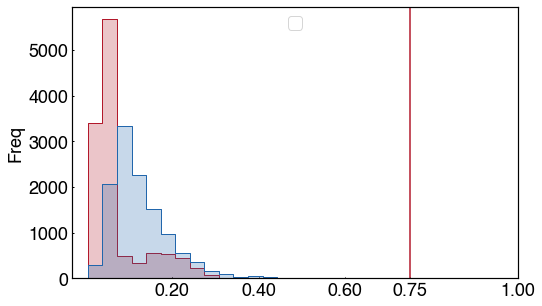

In [11]:
plt.figure(figsize=(8,5))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=1)
plt.tick_params(which='major',width=1)
palette = {"Zearalenone": '#b2182b', "Ochratoxin A": '#2166ac'}  

ax = sns.histplot(x='Similarity scores',data=wdf, hue="Toxin", palette=palette, 
                  element="step", bins=20)

plt.axvline(0.75, color="#b2182b")
ax.legend(fontsize=18, loc=9) 
ax.set(xlabel=None)

plt.xticks([0.2, 0.4, 0.6, 0.75, 1.0], fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Freq", fontname='Helvetica', fontsize=18)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)

plt.savefig("./figures/Fig_S1_molecular_level.png", dpi=400, bbox_inches = 'tight')

In [12]:
toxin_name = "Ochratoxin A"
toxin_smiles = "C[C@@H]1CC2=C(C=C(C(=C2C(=O)O1)O)C(=O)N[C@@H](CC3=CC=CC=C3)C(=O)O)Cl"
ota_lst = calc_sim(toxin_name, toxin_smiles, rhea_mol_lst)
ota_lst.sort()
most_sim_molecule = ota_lst[-1]
print("The most similar molecule of OTA in Rhea: ", most_sim_molecule)

toxin_name = "Zearalenone"
toxin_smiles = "C[C@H]1CCCC(=O)CCC/C=C/C2=C(C(=CC(=C2)O)O)C(=O)O1"
zea_lst = calc_sim(toxin_name, toxin_smiles, rhea_mol_lst)
zea_lst.sort()
most_sim_molecule = zea_lst[-1]
print("The most similar molecule of ZEA in Rhea: ", most_sim_molecule)


toxin_name = "Vanillin"
toxin_smiles = "COC1=C(C=CC(=C1)C=O)O"
van_lst = calc_sim(toxin_name, toxin_smiles, rhea_mol_lst)
van_lst.sort()
most_sim_molecule = van_lst[-1]
print("The most similar molecule of ZEA in Vanillin: ", most_sim_molecule)


toxin_name = "Quercetin"
toxin_smiles = "C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O"
que_lst = calc_sim(toxin_name, toxin_smiles, rhea_mol_lst)
que_lst.sort()
most_sim_molecule = que_lst[-1]
print("The most similar molecule of Quercetin in Rhea: ", most_sim_molecule)


toxin_name = "Glutamic acid"
toxin_smiles = "C(CC(=O)O)[C@@H](C(=O)O)N"
glu_lst = calc_sim(toxin_name, toxin_smiles, rhea_mol_lst)
glu_lst.sort()
most_sim_molecule = glu_lst[-1]
print("The most similar molecule of ZEA in Glutamic: ", most_sim_molecule)


The most similar molecule of OTA in Rhea:  [0.6785714285714286, 'O=C(N[C@H](CO)Cc1ccccc1)c1ccccc1']
The most similar molecule of ZEA in Rhea:  [0.34782608695652173, 'Oc1cccc(O)c1']
The most similar molecule of ZEA in Vanillin:  [1.0, 'COc1cc(C=O)ccc1O']
The most similar molecule of Quercetin in Rhea:  [1.0, 'O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc([O-])cc(O)c12']
The most similar molecule of ZEA in Glutamic:  [1.0, '[NH3+][C@H](CCC(=O)[O-])C(=O)[O-]']


In [13]:
df1 = pd.DataFrame({"Toxin": ["Ochratoxin A"]*len([c[0] for c in ota_lst if c[0]> 0.2]), "Similarity scores": [c[0] for c in ota_lst if c[0]> 0.2]})
df2 = pd.DataFrame({"Toxin": ["Zearalenone"]*len([c[0] for c in zea_lst if c[0]> 0.2]), "Similarity scores": [c[0] for c in zea_lst if c[0]> 0.2]})
df3 = pd.DataFrame({"Toxin": ["Vanillin"]*len( [c[0] for c in van_lst if c[0]> 0.2]), "Similarity scores": [c[0] for c in van_lst if c[0]> 0.2]})
df4 = pd.DataFrame({"Toxin": ["Quercetin"]*len([c[0] for c in que_lst if c[0]> 0.2]), "Similarity scores": [c[0] for c in que_lst if c[0]> 0.2]})
df5 = pd.DataFrame({"Toxin": ["Glutamic acid"]*len([c[0] for c in glu_lst if c[0]> 0.2]), "Similarity scores": [c[0] for c in glu_lst if c[0]> 0.2]})

wdf = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)   
wdf.reset_index()
wdf.head()

,Toxin,Similarity scores
0,Ochratoxin A,0.203704
1,Ochratoxin A,0.204082
2,Ochratoxin A,0.204082
3,Ochratoxin A,0.204082
4,Ochratoxin A,0.204545


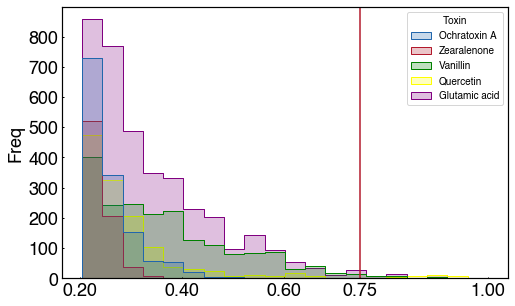

In [14]:
plt.figure(figsize=(8,5))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=1)
plt.tick_params(which='major',width=1)
palette = {"Zearalenone": '#b2182b', "Ochratoxin A": '#2166ac',
           'Vanillin': 'green', "Quercetin": 'yellow', 'Glutamic acid': "purple"}  

ax = sns.histplot(x='Similarity scores',data=wdf, hue="Toxin", palette=palette, 
                  element="step", bins=20)
plt.axvline(0.75, color="#b2182b")

# ax.legend(fontsize=18, loc=9) 
ax.set(xlabel=None)

# plt.yticks([30000, 60000, 90000, 120000, 150000, 180000])
plt.xticks([0.2, 0.4, 0.6, 0.75, 1.0], fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Freq", fontname='Helvetica', fontsize=18)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)


plt.savefig("./figures/Fig_S1_molecular_level_mulit_moles.png", dpi=400, bbox_inches = 'tight')

In [15]:
df1 = pd.DataFrame({"Model": ["ZEA"]*len(zea_lst), "Weights":  [c[0] for c in zea_lst]})
df2 = pd.DataFrame({"Model": ["OTA"]*len(ota_lst), "Weights":  [c[0] for c in ota_lst]})
wdf2 = pd.concat([df1, df2], ignore_index=True)    
wdf2.reset_index()
wdf2.head()

,Model,Weights
0,ZEA,0.004608
1,ZEA,0.007194
2,ZEA,0.007547
3,ZEA,0.007874
4,ZEA,0.008230


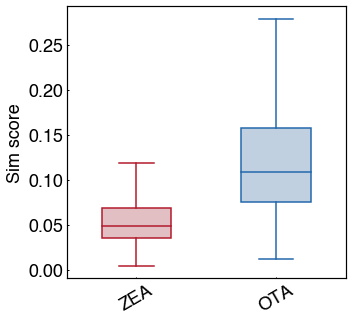

In [16]:
plt.figure(figsize=(5.0,5))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=1)
plt.tick_params(which='major',width=1)
palette = {"ZEA": '#b2182b', "OTA": '#2166ac',}  

ax = sns.boxplot(data=wdf2, x="Model", y="Weights", order = ["ZEA", "OTA", ],
    palette=palette, showfliers=False, linewidth=1.5, width=0.5) # boxprops=dict(alpha=1.0)

ax.set(xlabel=None)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.3))

for i, artist in enumerate(ax.artists):
    if i % 2 == 0:
        col = '#b2182b'
    else:
        col = '#2166ac'
    artist.set_edgecolor(col)
    
    for j in range(i*5,i*5+5):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
    
handles = [ax.artists[0], ax.artists[1]]

plt.rcParams['font.family'] = 'Helvetica'
plt.ylabel("Sim score", fontname='Helvetica', fontsize=18)


plt.xticks(fontsize=18, rotation=30)
plt.yticks(fontsize=18)

ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)

plt.savefig("./figures/Fig_S1_box_muliti_moles.png", dpi=400, bbox_inches = 'tight')

In [17]:
df1 = pd.DataFrame({"Model": ["Ochratoxin A"]*len(ota_lst), "Weights": [c[0] for c in ota_lst]})
df2 = pd.DataFrame({"Model": ["Zearalenone"]*len(zea_lst), "Weights": [c[0] for c in zea_lst]})
df3 = pd.DataFrame({"Model": ["Vanillin"]*len(van_lst), "Weights": [c[0] for c in van_lst]})
df4 = pd.DataFrame({"Model": ["Quercetin"]*len(que_lst), "Weights": [c[0] for c in que_lst]})
df5 = pd.DataFrame({"Model": ["Glutamic acid"]*len(glu_lst), "Weights": [c[0] for c in glu_lst]})

wdf2 = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)   
wdf2.reset_index()
wdf2.head()

,Model,Weights
0,Ochratoxin A,0.011468
1,Ochratoxin A,0.012658
2,Ochratoxin A,0.017544
3,Ochratoxin A,0.021127
4,Ochratoxin A,0.021277


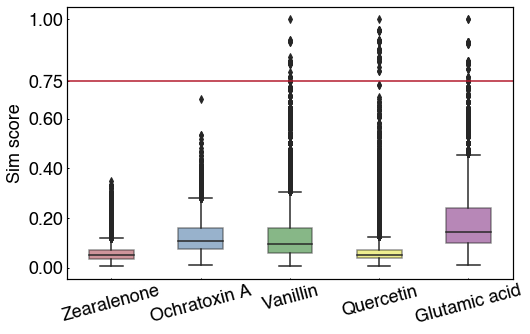

In [18]:
plt.figure(figsize=(8.0,5))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=1)
plt.tick_params(which='major',width=1)

palette = {"Zearalenone": '#b2182b', "Ochratoxin A": '#2166ac',
           'Vanillin': 'green', "Quercetin": 'yellow', 'Glutamic acid': "purple"}  # green

ax = sns.boxplot(data=wdf2, x="Model", y="Weights", order = ["Zearalenone", "Ochratoxin A", 'Vanillin', 'Quercetin', 'Glutamic acid'],
    palette=palette, showfliers=True, linewidth=1.5, width=0.5, boxprops=dict(alpha=0.5))  # boxprops=dict(alpha=1.0)

ax.set(xlabel=None)

plt.axhline(0.75, color="#b2182b")

plt.rcParams['font.family'] = 'Helvetica'
plt.ylabel("Sim score", fontname='Helvetica', fontsize=18)


plt.xticks(fontsize=18, rotation=15)
plt.yticks([0, 0.20, 0.40, 0.60, 0.75, 1, ], fontsize=18)

ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)

plt.savefig("./figures/Fig_S1_box_muliti_moles.png", dpi=400, bbox_inches = 'tight')

# Calculate reaction similarity

In [19]:
# Download reaction data from Rhea
!wget https://ftp.expasy.org/databases/rhea/ctfiles/rhea-rxn.tar.gz

In [20]:
! tar -xzvf rhea-rxn.tar.gz

x rxn/
x rxn/49741.rxn
x rxn/53150.rxn
x rxn/32905.rxn
x rxn/42837.rxn
x rxn/32836.rxn
x rxn/13890.rxn
x rxn/13070.rxn
x rxn/49349.rxn
x rxn/41386.rxn
x rxn/55681.rxn
x rxn/70564.rxn
x rxn/54409.rxn
x rxn/38949.rxn
x rxn/25165.rxn
x rxn/65169.rxn
x rxn/51405.rxn
x rxn/43586.rxn
x rxn/13583.rxn
x rxn/34056.rxn
x rxn/44057.rxn
x rxn/21838.rxn
x rxn/22121.rxn
x rxn/67046.rxn
x rxn/56258.rxn
x rxn/16254.rxn
x rxn/17442.rxn
x rxn/57446.rxn
x rxn/48778.rxn
x rxn/48678.rxn
x rxn/13214.rxn
x rxn/36644.rxn
x rxn/53218.rxn
x rxn/17711.rxn
x rxn/14886.rxn
x rxn/54645.rxn
x rxn/12846.rxn
x rxn/36072.rxn
x rxn/53114.rxn
x rxn/13110.rxn
x rxn/17319.rxn
x rxn/33057.rxn
x rxn/12357.rxn
x rxn/58617.rxn
x rxn/22546.rxn
x rxn/70492.rxn
x rxn/34764.rxn
x rxn/44765.rxn
x rxn/50389.rxn
x rxn/40388.rxn
x rxn/35076.rxn
x rxn/45077.rxn
x rxn/54414.rxn
x rxn/14410.rxn
x rxn/54741.rxn
x rxn/39132.rxn
x rxn/49733.rxn
x rxn/41462.rxn
x rxn/24593.rxn
x rxn/51601.rxn
x rxn/64597.rxn
x rxn/43690.rxn
x rxn/59278.rxn
x

x rxn/25549.rxn
x rxn/24242.rxn
x rxn/14287.rxn
x rxn/21097.rxn
x rxn/65317.rxn
x rxn/25313.rxn
x rxn/59421.rxn
x rxn/54470.rxn
x rxn/65897.rxn
x rxn/31525.rxn
x rxn/69752.rxn
x rxn/29105.rxn
x rxn/17419.rxn
x rxn/69109.rxn
x rxn/58249.rxn
x rxn/54109.rxn
x rxn/59470.rxn
x rxn/32000.rxn
x rxn/42001.rxn
x rxn/26310.rxn
x rxn/38553.rxn
x rxn/66602.rxn
x rxn/31628.rxn
x rxn/41629.rxn
x rxn/38757.rxn
x rxn/43989.rxn
x rxn/33988.rxn
x rxn/52398.rxn
x rxn/55190.rxn
x rxn/40652.rxn
x rxn/50653.rxn
x rxn/53326.rxn
x rxn/13322.rxn
x rxn/23585.rxn
x rxn/22582.rxn
x rxn/38857.rxn
x rxn/63589.rxn
x rxn/62586.rxn
x rxn/64709.rxn
x rxn/44274.rxn
x rxn/12746.rxn
x rxn/14271.rxn
x rxn/14426.rxn
x rxn/33421.rxn
x rxn/41494.rxn
x rxn/14238.rxn
x rxn/37993.rxn
x rxn/65274.rxn
x rxn/69660.rxn
x rxn/70585.rxn
x rxn/28192.rxn
x rxn/32405.rxn
x rxn/45617.rxn
x rxn/35616.rxn
x rxn/65062.rxn
x rxn/67065.rxn
x rxn/48738.rxn
x rxn/63846.rxn
x rxn/16634.rxn
x rxn/56638.rxn
x rxn/23842.rxn
x rxn/61154.rxn
x rxn/17

x rxn/57609.rxn
x rxn/56229.rxn
x rxn/57629.rxn
x rxn/40317.rxn
x rxn/30316.rxn
x rxn/11166.rxn
x rxn/48870.rxn
x rxn/36781.rxn
x rxn/25806.rxn
x rxn/65309.rxn
x rxn/19963.rxn
x rxn/23138.rxn
x rxn/33601.rxn
x rxn/24038.rxn
x rxn/70653.rxn
x rxn/59374.rxn
x rxn/19370.rxn
x rxn/38441.rxn
x rxn/12839.rxn
x rxn/54333.rxn
x rxn/51142.rxn
x rxn/19175.rxn
x rxn/50298.rxn
x rxn/20295.rxn
x rxn/28308.rxn
x rxn/41909.rxn
x rxn/31908.rxn
x rxn/39824.rxn
x rxn/34385.rxn
x rxn/11877.rxn
x rxn/16663.rxn
x rxn/10294.rxn
x rxn/53453.rxn
x rxn/14099.rxn
x rxn/31180.rxn
x rxn/41181.rxn
x rxn/50602.rxn
x rxn/21077.rxn
x rxn/48598.rxn
x rxn/40564.rxn
x rxn/50565.rxn
x rxn/31009.rxn
x rxn/38424.rxn
x rxn/16978.rxn
x rxn/39901.rxn
x rxn/61933.rxn
x rxn/11694.rxn
x rxn/51698.rxn
x rxn/43242.rxn
x rxn/30913.rxn
x rxn/47478.rxn
x rxn/57830.rxn
x rxn/30740.rxn
x rxn/40741.rxn
x rxn/56145.rxn
x rxn/32973.rxn
x rxn/51865.rxn
x rxn/35745.rxn
x rxn/25744.rxn
x rxn/14614.rxn
x rxn/54618.rxn
x rxn/54362.rxn
x rxn/55

x rxn/17223.rxn
x rxn/44078.rxn
x rxn/14075.rxn
x rxn/69358.rxn
x rxn/37604.rxn
x rxn/37860.rxn
x rxn/26239.rxn
x rxn/31561.rxn
x rxn/44830.rxn
x rxn/14306.rxn
x rxn/67901.rxn
x rxn/56637.rxn
x rxn/68690.rxn
x rxn/28227.rxn
x rxn/58202.rxn
x rxn/57170.rxn
x rxn/10726.rxn
x rxn/53070.rxn
x rxn/18258.rxn
x rxn/47613.rxn
x rxn/69989.rxn
x rxn/28784.rxn
x rxn/52537.rxn
x rxn/12533.rxn
x rxn/29985.rxn
x rxn/13547.rxn
x rxn/65393.rxn
x rxn/19639.rxn
x rxn/17091.rxn
x rxn/68877.rxn
x rxn/28873.rxn
x rxn/66925.rxn
x rxn/20634.rxn
x rxn/60638.rxn
x rxn/18659.rxn
x rxn/58682.rxn
x rxn/34372.rxn
x rxn/44373.rxn
x rxn/33041.rxn
x rxn/48430.rxn
x rxn/35349.rxn
x rxn/25348.rxn
x rxn/40212.rxn
x rxn/28932.rxn
x rxn/18078.rxn
x rxn/48637.rxn
x rxn/54410.rxn
x rxn/46742.rxn
x rxn/45869.rxn
x rxn/35868.rxn
x rxn/30885.rxn
x rxn/53501.rxn
x rxn/16907.rxn
x rxn/36893.rxn
x rxn/24641.rxn
x rxn/64645.rxn
x rxn/35017.rxn
x rxn/37285.rxn
x rxn/68010.rxn
x rxn/41733.rxn
x rxn/31732.rxn
x rxn/19479.rxn
x rxn/25

x rxn/50189.rxn
x rxn/39580.rxn
x rxn/65542.rxn
x rxn/25401.rxn
x rxn/41702.rxn
x rxn/10602.rxn
x rxn/50606.rxn
x rxn/33189.rxn
x rxn/48705.rxn
x rxn/15506.rxn
x rxn/10670.rxn
x rxn/39820.rxn
x rxn/50674.rxn
x rxn/20671.rxn
x rxn/33221.rxn
x rxn/42802.rxn
x rxn/19038.rxn
x rxn/70500.rxn
x rxn/60194.rxn
x rxn/33896.rxn
x rxn/43897.rxn
x rxn/38244.rxn
x rxn/28355.rxn
x rxn/42534.rxn
x rxn/15726.rxn
x rxn/36044.rxn
x rxn/24041.rxn
x rxn/64045.rxn
x rxn/25813.rxn
x rxn/41950.rxn
x rxn/24786.rxn
x rxn/29965.rxn
x rxn/69969.rxn
x rxn/48226.rxn
x rxn/65817.rxn
x rxn/60657.rxn
x rxn/66501.rxn
x rxn/50782.rxn
x rxn/21641.rxn
x rxn/61070.rxn
x rxn/60326.rxn
x rxn/40845.rxn
x rxn/20322.rxn
x rxn/70848.rxn
x rxn/30844.rxn
x rxn/37744.rxn
x rxn/47134.rxn
x rxn/67610.rxn
x rxn/27968.rxn
x rxn/57585.rxn
x rxn/39333.rxn
x rxn/52757.rxn
x rxn/62729.rxn
x rxn/22725.rxn
x rxn/22845.rxn
x rxn/36525.rxn
x rxn/54601.rxn
x rxn/35096.rxn
x rxn/45097.rxn
x rxn/62849.rxn
x rxn/60457.rxn
x rxn/55553.rxn
x rxn/51

x rxn/36392.rxn
x rxn/37937.rxn
x rxn/38905.rxn
x rxn/44126.rxn
x rxn/14123.rxn
x rxn/40864.rxn
x rxn/50865.rxn
x rxn/10861.rxn
x rxn/10966.rxn
x rxn/27616.rxn
x rxn/46890.rxn
x rxn/52670.rxn
x rxn/17779.rxn
x rxn/34365.rxn
x rxn/64285.rxn
x rxn/53253.rxn
x rxn/70777.rxn
x rxn/45042.rxn
x rxn/45989.rxn
x rxn/35988.rxn
x rxn/30773.rxn
x rxn/40045.rxn
x rxn/30044.rxn
x rxn/31437.rxn
x rxn/70048.rxn
x rxn/28275.rxn
x rxn/13819.rxn
x rxn/59901.rxn
x rxn/48833.rxn
x rxn/57082.rxn
x rxn/48681.rxn
x rxn/57305.rxn
x rxn/65266.rxn
x rxn/25262.rxn
x rxn/66970.rxn
x rxn/29041.rxn
x rxn/36204.rxn
x rxn/37261.rxn
x rxn/13006.rxn
x rxn/33637.rxn
x rxn/47686.rxn
x rxn/24505.rxn
x rxn/64509.rxn
x rxn/12589.rxn
x rxn/42314.rxn
x rxn/48373.rxn
x rxn/35613.rxn
x rxn/30957.rxn
x rxn/61561.rxn
x rxn/52122.rxn
x rxn/65373.rxn
x rxn/47098.rxn
x rxn/34688.rxn
x rxn/44689.rxn
x rxn/38173.rxn
x rxn/51637.rxn
x rxn/11633.rxn
x rxn/48129.rxn
x rxn/29220.rxn
x rxn/20222.rxn
x rxn/60226.rxn
x rxn/38589.rxn
x rxn/57

x rxn/10090.rxn
x rxn/20091.rxn
x rxn/33952.rxn
x rxn/43953.rxn
x rxn/69913.rxn
x rxn/30241.rxn
x rxn/70245.rxn
x rxn/28864.rxn
x rxn/66378.rxn
x rxn/17443.rxn
x rxn/19975.rxn
x rxn/26374.rxn
x rxn/58437.rxn
x rxn/66301.rxn
x rxn/48822.rxn
x rxn/67486.rxn
x rxn/52954.rxn
x rxn/27482.rxn
x rxn/41526.rxn
x rxn/58054.rxn
x rxn/18050.rxn
x rxn/52581.rxn
x rxn/67525.rxn
x rxn/67141.rxn
x rxn/62038.rxn
x rxn/22034.rxn
x rxn/59830.rxn
x rxn/33073.rxn
x rxn/13326.rxn
x rxn/48261.rxn
x rxn/53929.rxn
x rxn/54129.rxn
x rxn/60013.rxn
x rxn/50918.rxn
x rxn/10914.rxn
x rxn/10198.rxn
x rxn/17411.rxn
x rxn/46001.rxn
x rxn/48494.rxn
x rxn/18586.rxn
x rxn/36485.rxn
x rxn/20066.rxn
x rxn/49258.rxn
x rxn/32992.rxn
x rxn/42993.rxn
x rxn/67433.rxn
x rxn/62993.rxn
x rxn/14239.rxn
x rxn/48249.rxn
x rxn/18203.rxn
x rxn/38497.rxn
x rxn/37584.rxn
x rxn/12249.rxn
x rxn/64641.rxn
x rxn/66050.rxn
x rxn/53513.rxn
x rxn/69769.rxn
x rxn/29765.rxn
x rxn/62478.rxn
x rxn/22474.rxn
x rxn/48198.rxn
x rxn/60282.rxn
x rxn/56

x rxn/48146.rxn
x rxn/21181.rxn
x rxn/61185.rxn
x rxn/36037.rxn
x rxn/57213.rxn
x rxn/33560.rxn
x rxn/43561.rxn
x rxn/69861.rxn
x rxn/46301.rxn
x rxn/35693.rxn
x rxn/25692.rxn
x rxn/28027.rxn
x rxn/54537.rxn
x rxn/37817.rxn
x rxn/47497.rxn
x rxn/44718.rxn
x rxn/37953.rxn
x rxn/25038.rxn
x rxn/49433.rxn
x rxn/24757.rxn
x rxn/65138.rxn
x rxn/15654.rxn
x rxn/29648.rxn
x rxn/25655.rxn
x rxn/58833.rxn
x rxn/55658.rxn
x rxn/38940.rxn
x rxn/39389.rxn
x rxn/30413.rxn
x rxn/70417.rxn
x rxn/59569.rxn
x rxn/17846.rxn
x rxn/15798.rxn
x rxn/44673.rxn
x rxn/34672.rxn
x rxn/14767.rxn
x rxn/22049.rxn
x rxn/61398.rxn
x rxn/21394.rxn
x rxn/24198.rxn
x rxn/67526.rxn
x rxn/23070.rxn
x rxn/65150.rxn
x rxn/49789.rxn
x rxn/46045.rxn
x rxn/39525.rxn
x rxn/29045.rxn
x rxn/69049.rxn
x rxn/45637.rxn
x rxn/35636.rxn
x rxn/62054.rxn
x rxn/22050.rxn
x rxn/60269.rxn
x rxn/28064.rxn
x rxn/13794.rxn
x rxn/53798.rxn
x rxn/59214.rxn
x rxn/59998.rxn
x rxn/19994.rxn
x rxn/68314.rxn
x rxn/27744.rxn
x rxn/22986.rxn
x rxn/15

x rxn/33476.rxn
x rxn/43477.rxn
x rxn/10421.rxn
x rxn/50425.rxn
x rxn/40424.rxn
x rxn/19426.rxn
x rxn/21017.rxn
x rxn/22882.rxn
x rxn/62886.rxn
x rxn/31229.rxn
x rxn/39153.rxn
x rxn/22106.rxn
x rxn/34808.rxn
x rxn/44809.rxn
x rxn/56982.rxn
x rxn/58457.rxn
x rxn/44062.rxn
x rxn/67225.rxn
x rxn/34204.rxn
x rxn/44205.rxn
x rxn/57757.rxn
x rxn/11358.rxn
x rxn/21337.rxn
x rxn/52037.rxn
x rxn/44878.rxn
x rxn/12033.rxn
x rxn/14875.rxn
x rxn/60045.rxn
x rxn/28391.rxn
x rxn/37360.rxn
x rxn/23289.rxn
x rxn/59557.rxn
x rxn/43201.rxn
x rxn/33200.rxn
x rxn/57565.rxn
x rxn/54785.rxn
x rxn/62481.rxn
x rxn/30172.rxn
x rxn/40173.rxn
x rxn/12911.rxn
x rxn/19043.rxn
x rxn/23890.rxn
x rxn/32129.rxn
x rxn/13675.rxn
x rxn/17875.rxn
x rxn/61965.rxn
x rxn/57661.rxn
x rxn/62262.rxn
x rxn/36849.rxn
x rxn/20663.rxn
x rxn/50666.rxn
x rxn/60934.rxn
x rxn/10662.rxn
x rxn/18887.rxn
x rxn/49677.rxn
x rxn/48361.rxn
x rxn/62233.rxn
x rxn/43930.rxn
x rxn/35953.rxn
x rxn/61173.rxn
x rxn/55702.rxn
x rxn/69418.rxn
x rxn/53

x rxn/46498.rxn
x rxn/35677.rxn
x rxn/25676.rxn
x rxn/46282.rxn
x rxn/31792.rxn
x rxn/41793.rxn
x rxn/66690.rxn
x rxn/28728.rxn
x rxn/60289.rxn
x rxn/49517.rxn
x rxn/26066.rxn
x rxn/61910.rxn
x rxn/58969.rxn
x rxn/57477.rxn
x rxn/27795.rxn
x rxn/13271.rxn
x rxn/27478.rxn
x rxn/67550.rxn
x rxn/38077.rxn
x rxn/49850.rxn
x rxn/24880.rxn
x rxn/10821.rxn
x rxn/34881.rxn
x rxn/50825.rxn
x rxn/40824.rxn
x rxn/53357.rxn
x rxn/37397.rxn
x rxn/67185.rxn
x rxn/12939.rxn
x rxn/61685.rxn
x rxn/35073.rxn
x rxn/25072.rxn
x rxn/24766.rxn
x rxn/16595.rxn
x rxn/22754.rxn
x rxn/62758.rxn
x rxn/60057.rxn
x rxn/15706.rxn
x rxn/25707.rxn
x rxn/60945.rxn
x rxn/48314.rxn
x rxn/19547.rxn
x rxn/21818.rxn
x rxn/17507.rxn
x rxn/31616.rxn
x rxn/41617.rxn
x rxn/19643.rxn
x rxn/51354.rxn
x rxn/24630.rxn
x rxn/64634.rxn
x rxn/22266.rxn
x rxn/68829.rxn
x rxn/28825.rxn
x rxn/11350.rxn
x rxn/18543.rxn
x rxn/28757.rxn
x rxn/66201.rxn
x rxn/37588.rxn
x rxn/46617.rxn
x rxn/65294.rxn
x rxn/50985.rxn
x rxn/40984.rxn
x rxn/52

x rxn/22405.rxn
x rxn/17291.rxn
x rxn/20941.rxn
x rxn/46990.rxn
x rxn/16278.rxn
x rxn/17451.rxn
x rxn/28296.rxn
x rxn/16519.rxn
x rxn/41714.rxn
x rxn/54938.rxn
x rxn/14934.rxn
x rxn/41509.rxn
x rxn/31508.rxn
x rxn/39461.rxn
x rxn/37501.rxn
x rxn/24193.rxn
x rxn/64197.rxn
x rxn/16906.rxn
x rxn/31921.rxn
x rxn/17715.rxn
x rxn/46690.rxn
x rxn/38429.rxn
x rxn/69453.rxn
x rxn/19063.rxn
x rxn/52990.rxn
x rxn/63266.rxn
x rxn/23262.rxn
x rxn/50122.rxn
x rxn/16998.rxn
x rxn/37373.rxn
x rxn/37520.rxn
x rxn/58409.rxn
x rxn/12370.rxn
x rxn/60237.rxn
x rxn/50949.rxn
x rxn/10945.rxn
x rxn/49994.rxn
x rxn/59869.rxn
x rxn/58810.rxn
x rxn/37204.rxn
x rxn/47673.rxn
x rxn/60070.rxn
x rxn/21186.rxn
x rxn/12682.rxn
x rxn/52686.rxn
x rxn/46834.rxn
x rxn/56313.rxn
x rxn/41885.rxn
x rxn/31884.rxn
x rxn/19238.rxn
x rxn/62477.rxn
x rxn/17590.rxn
x rxn/57594.rxn
x rxn/22473.rxn
x rxn/42865.rxn
x rxn/32864.rxn
x rxn/28067.rxn
x rxn/21569.rxn
x rxn/24680.rxn
x rxn/62874.rxn
x rxn/34681.rxn
x rxn/13775.rxn
x rxn/43

x rxn/19359.rxn
x rxn/36800.rxn
x rxn/68461.rxn
x rxn/22238.rxn
x rxn/24957.rxn
x rxn/57933.rxn
x rxn/33428.rxn
x rxn/43429.rxn
x rxn/33856.rxn
x rxn/43857.rxn
x rxn/16902.rxn
x rxn/34213.rxn
x rxn/56906.rxn
x rxn/32344.rxn
x rxn/42345.rxn
x rxn/43394.rxn
x rxn/13391.rxn
x rxn/45942.rxn
x rxn/12577.rxn
x rxn/30649.rxn
x rxn/49074.rxn
x rxn/26440.rxn
x rxn/10946.rxn
x rxn/18890.rxn
x rxn/17562.rxn
x rxn/57566.rxn
x rxn/38808.rxn
x rxn/69442.rxn
x rxn/58894.rxn
x rxn/54437.rxn
x rxn/49410.rxn
x rxn/30757.rxn
x rxn/46166.rxn
x rxn/16743.rxn
x rxn/64538.rxn
x rxn/64354.rxn
x rxn/59054.rxn
x rxn/13810.rxn
x rxn/11849.rxn
x rxn/30160.rxn
x rxn/40161.rxn
x rxn/56189.rxn
x rxn/69454.rxn
x rxn/68641.rxn
x rxn/31605.rxn
x rxn/45757.rxn
x rxn/35756.rxn
x rxn/59689.rxn
x rxn/30177.rxn
x rxn/70089.rxn
x rxn/18211.rxn
x rxn/16379.rxn
x rxn/38225.rxn
x rxn/16615.rxn
x rxn/36821.rxn
x rxn/30085.rxn
x rxn/56669.rxn
x rxn/21497.rxn
x rxn/23309.rxn
x rxn/56802.rxn
x rxn/64621.rxn
x rxn/51674.rxn
x rxn/28

x rxn/23809.rxn
x rxn/15254.rxn
x rxn/55258.rxn
x rxn/25255.rxn
x rxn/47170.rxn
x rxn/42361.rxn
x rxn/32360.rxn
x rxn/30088.rxn
x rxn/40089.rxn
x rxn/70096.rxn
x rxn/58689.rxn
x rxn/30092.rxn
x rxn/40093.rxn
x rxn/19683.rxn
x rxn/23898.rxn
x rxn/34853.rxn
x rxn/60693.rxn
x rxn/27916.rxn
x rxn/66118.rxn
x rxn/58053.rxn
x rxn/25671.rxn
x rxn/15670.rxn
x rxn/47670.rxn
x rxn/47162.rxn
x rxn/20810.rxn
x rxn/60814.rxn
x rxn/31748.rxn
x rxn/41749.rxn
x rxn/55665.rxn
x rxn/20777.rxn
x rxn/27643.rxn
x rxn/42370.rxn
x rxn/41366.rxn
x rxn/68050.rxn
x rxn/12230.rxn
x rxn/52234.rxn
x rxn/56989.rxn
x rxn/58910.rxn
x rxn/61554.rxn
x rxn/21550.rxn
x rxn/20725.rxn
x rxn/39236.rxn
x rxn/13347.rxn
x rxn/60729.rxn
x rxn/29708.rxn
x rxn/46489.rxn
x rxn/37117.rxn
x rxn/54429.rxn
x rxn/18283.rxn
x rxn/66578.rxn
x rxn/37089.rxn
x rxn/37193.rxn
x rxn/45678.rxn
x rxn/61273.rxn
x rxn/15675.rxn
x rxn/17558.rxn
x rxn/54057.rxn
x rxn/29496.rxn
x rxn/45921.rxn
x rxn/35920.rxn
x rxn/65242.rxn
x rxn/36224.rxn
x rxn/32

x rxn/68589.rxn
x rxn/50933.rxn
x rxn/40932.rxn
x rxn/53621.rxn
x rxn/31253.rxn
x rxn/54902.rxn
x rxn/12293.rxn
x rxn/52297.rxn
x rxn/68209.rxn
x rxn/19147.rxn
x rxn/53286.rxn
x rxn/13282.rxn
x rxn/43342.rxn
x rxn/44181.rxn
x rxn/34180.rxn
x rxn/50794.rxn
x rxn/19226.rxn
x rxn/23014.rxn
x rxn/29560.rxn
x rxn/63018.rxn
x rxn/51953.rxn
x rxn/55005.rxn
x rxn/15647.rxn
x rxn/20570.rxn
x rxn/52470.rxn
x rxn/12767.rxn
x rxn/32613.rxn
x rxn/53205.rxn
x rxn/58650.rxn
x rxn/59978.rxn
x rxn/19974.rxn
x rxn/12951.rxn
x rxn/61869.rxn
x rxn/21865.rxn
x rxn/49222.rxn
x rxn/20162.rxn
x rxn/60166.rxn
x rxn/38140.rxn
x rxn/59045.rxn
x rxn/37784.rxn
x rxn/56549.rxn
x rxn/63734.rxn
x rxn/23730.rxn
x rxn/58450.rxn
x rxn/43090.rxn
x rxn/31069.rxn
x rxn/42073.rxn
x rxn/32072.rxn
x rxn/50754.rxn
x rxn/66629.rxn
x rxn/30956.rxn
x rxn/40957.rxn
x rxn/13471.rxn
x rxn/47658.rxn
x rxn/19266.rxn
x rxn/60265.rxn
x rxn/56925.rxn
x rxn/21230.rxn
x rxn/59553.rxn
x rxn/43093.rxn
x rxn/33092.rxn
x rxn/69054.rxn
x rxn/45

x rxn/43598.rxn
x rxn/66042.rxn
x rxn/17426.rxn
x rxn/13739.rxn
x rxn/47265.rxn
x rxn/46937.rxn
x rxn/45634.rxn
x rxn/63533.rxn
x rxn/56490.rxn
x rxn/68630.rxn
x rxn/57773.rxn
x rxn/37073.rxn
x rxn/10825.rxn
x rxn/48565.rxn
x rxn/50829.rxn
x rxn/40828.rxn
x rxn/42798.rxn
x rxn/68169.rxn
x rxn/12795.rxn
x rxn/57601.rxn
x rxn/62546.rxn
x rxn/22542.rxn
x rxn/33220.rxn
x rxn/43221.rxn
x rxn/24326.rxn
x rxn/48662.rxn
x rxn/35972.rxn
x rxn/45973.rxn
x rxn/63306.rxn
x rxn/23302.rxn
x rxn/11897.rxn
x rxn/11406.rxn
x rxn/70157.rxn
x rxn/30153.rxn
x rxn/39797.rxn
x rxn/14259.rxn
x rxn/14110.rxn
x rxn/30017.rxn
x rxn/12898.rxn
x rxn/64002.rxn
x rxn/67186.rxn
x rxn/28015.rxn
x rxn/17282.rxn
x rxn/21829.rxn
x rxn/13590.rxn
x rxn/53594.rxn
x rxn/57286.rxn
x rxn/26287.rxn
x rxn/12322.rxn
x rxn/52326.rxn
x rxn/27827.rxn
x rxn/63625.rxn
x rxn/18871.rxn
x rxn/47017.rxn
x rxn/68869.rxn
x rxn/28865.rxn
x rxn/54513.rxn
x rxn/29337.rxn
x rxn/69393.rxn
x rxn/63918.rxn
x rxn/42390.rxn
x rxn/13859.rxn
x rxn/52

x rxn/44829.rxn
x rxn/34828.rxn
x rxn/64786.rxn
x rxn/24782.rxn
x rxn/29401.rxn
x rxn/70509.rxn
x rxn/60722.rxn
x rxn/13543.rxn
x rxn/43546.rxn
x rxn/39581.rxn
x rxn/30505.rxn
x rxn/23357.rxn
x rxn/37517.rxn
x rxn/44569.rxn
x rxn/62922.rxn
x rxn/34568.rxn
x rxn/67829.rxn
x rxn/37101.rxn
x rxn/70700.rxn
x rxn/23481.rxn
x rxn/42277.rxn
x rxn/32276.rxn
x rxn/30324.rxn
x rxn/23817.rxn
x rxn/40325.rxn
x rxn/47097.rxn
x rxn/16479.rxn
x rxn/16591.rxn
x rxn/18771.rxn
x rxn/19323.rxn
x rxn/56117.rxn
x rxn/24133.rxn
x rxn/17271.rxn
x rxn/53982.rxn
x rxn/64137.rxn
x rxn/26158.rxn
x rxn/38148.rxn
x rxn/62881.rxn
x rxn/20862.rxn
x rxn/37532.rxn
x rxn/60866.rxn
x rxn/41854.rxn
x rxn/38292.rxn
x rxn/66989.rxn
x rxn/65805.rxn
x rxn/55822.rxn
x rxn/65813.rxn
x rxn/12173.rxn
x rxn/52177.rxn
x rxn/56830.rxn
x rxn/55701.rxn
x rxn/12117.rxn
x rxn/48797.rxn
x rxn/54730.rxn
x rxn/37812.rxn
x rxn/13127.rxn
x rxn/46390.rxn
x rxn/32529.rxn
x rxn/16267.rxn
x rxn/14015.rxn
x rxn/44018.rxn
x rxn/17903.rxn
x rxn/35

x rxn/16475.rxn
x rxn/67921.rxn
x rxn/36168.rxn
x rxn/14235.rxn
x rxn/44238.rxn
x rxn/46726.rxn
x rxn/15179.rxn
x rxn/50510.rxn
x rxn/24458.rxn
x rxn/10706.rxn
x rxn/56210.rxn
x rxn/36056.rxn
x rxn/54914.rxn
x rxn/47025.rxn
x rxn/10265.rxn
x rxn/40268.rxn
x rxn/50269.rxn
x rxn/36592.rxn
x rxn/60117.rxn
x rxn/41817.rxn
x rxn/31816.rxn
x rxn/38828.rxn
x rxn/20047.rxn
x rxn/10046.rxn
x rxn/30213.rxn
x rxn/70217.rxn
x rxn/69101.rxn
x rxn/34432.rxn
x rxn/44433.rxn
x rxn/35701.rxn
x rxn/25700.rxn
x rxn/21446.rxn
x rxn/39609.rxn
x rxn/66138.rxn
x rxn/26134.rxn
x rxn/52565.rxn
x rxn/41057.rxn
x rxn/31056.rxn
x rxn/16183.rxn
x rxn/59450.rxn
x rxn/11354.rxn
x rxn/51358.rxn
x rxn/57373.rxn
x rxn/70740.rxn
x rxn/48602.rxn
x rxn/17506.rxn
x rxn/37296.rxn
x rxn/20406.rxn
x rxn/58729.rxn
x rxn/42182.rxn
x rxn/13959.rxn
x rxn/61494.rxn
x rxn/41962.rxn
x rxn/22346.rxn
x rxn/41393.rxn
x rxn/31392.rxn
x rxn/16127.rxn
x rxn/43094.rxn
x rxn/50381.rxn
x rxn/40380.rxn
x rxn/62750.rxn
x rxn/36216.rxn
x rxn/46

x rxn/10062.rxn
x rxn/20063.rxn
x rxn/50066.rxn
x rxn/58934.rxn
x rxn/13119.rxn
x rxn/41766.rxn
x rxn/13558.rxn
x rxn/37425.rxn
x rxn/40393.rxn
x rxn/30392.rxn
x rxn/70396.rxn
x rxn/34013.rxn
x rxn/35465.rxn
x rxn/53605.rxn
x rxn/59150.rxn
x rxn/30488.rxn
x rxn/40489.rxn
x rxn/61214.rxn
x rxn/49953.rxn
x rxn/29928.rxn
x rxn/46434.rxn
x rxn/25989.rxn
x rxn/14543.rxn
x rxn/37269.rxn
x rxn/44546.rxn
x rxn/30569.rxn
x rxn/51757.rxn
x rxn/11753.rxn
x rxn/55369.rxn
x rxn/36196.rxn
x rxn/37976.rxn
x rxn/36260.rxn
x rxn/28652.rxn
x rxn/27844.rxn
x rxn/56369.rxn
x rxn/38504.rxn
x rxn/66129.rxn
x rxn/26125.rxn
x rxn/54689.rxn
x rxn/25577.rxn
x rxn/52762.rxn
x rxn/68250.rxn
x rxn/32312.rxn
x rxn/42313.rxn
x rxn/11845.rxn
x rxn/51849.rxn
x rxn/45618.rxn
x rxn/15615.rxn
x rxn/15758.rxn
x rxn/29924.rxn
x rxn/48301.rxn
x rxn/31157.rxn
x rxn/69928.rxn
x rxn/20311.rxn
x rxn/17371.rxn
x rxn/57662.rxn
x rxn/20006.rxn
x rxn/47326.rxn
x rxn/65993.rxn
x rxn/29100.rxn
x rxn/56154.rxn
x rxn/57825.rxn
x rxn/16

x rxn/21210.rxn
x rxn/35049.rxn
x rxn/45342.rxn
x rxn/25048.rxn
x rxn/34569.rxn
x rxn/42590.rxn
x rxn/56609.rxn
x rxn/46277.rxn
x rxn/13235.rxn
x rxn/43238.rxn
x rxn/50405.rxn
x rxn/40404.rxn
x rxn/10401.rxn
x rxn/60686.rxn
x rxn/20682.rxn
x rxn/41610.rxn
x rxn/51162.rxn
x rxn/60758.rxn
x rxn/20754.rxn
x rxn/31777.rxn
x rxn/55442.rxn
x rxn/32504.rxn
x rxn/24509.rxn
x rxn/42505.rxn
x rxn/68685.rxn
x rxn/28681.rxn
x rxn/67138.rxn
x rxn/37965.rxn
x rxn/69218.rxn
x rxn/16178.rxn
x rxn/66914.rxn
x rxn/68269.rxn
x rxn/11986.rxn
x rxn/15835.rxn
x rxn/45838.rxn
x rxn/30081.rxn
x rxn/45718.rxn
x rxn/15715.rxn
x rxn/70085.rxn
x rxn/46069.rxn
x rxn/64653.rxn
x rxn/10650.rxn
x rxn/50654.rxn
x rxn/20651.rxn
x rxn/10753.rxn
x rxn/40756.rxn
x rxn/50757.rxn
x rxn/37844.rxn
x rxn/56278.rxn
x rxn/16274.rxn
x rxn/20547.rxn
x rxn/56465.rxn
x rxn/36513.rxn
x rxn/36653.rxn
x rxn/39621.rxn
x rxn/37789.rxn
x rxn/33705.rxn
x rxn/43530.rxn
x rxn/36068.rxn
x rxn/31889.rxn
x rxn/68570.rxn
x rxn/30769.rxn
x rxn/67

x rxn/57634.rxn
x rxn/41152.rxn
x rxn/48985.rxn
x rxn/22169.rxn
x rxn/55889.rxn
x rxn/42245.rxn
x rxn/35829.rxn
x rxn/32244.rxn
x rxn/26094.rxn
x rxn/66098.rxn
x rxn/34992.rxn
x rxn/44993.rxn
x rxn/48649.rxn
x rxn/37141.rxn
x rxn/21146.rxn
x rxn/55274.rxn
x rxn/21234.rxn
x rxn/61238.rxn
x rxn/57225.rxn
x rxn/49722.rxn
x rxn/70821.rxn
x rxn/31720.rxn
x rxn/41721.rxn
x rxn/37540.rxn
x rxn/24489.rxn
x rxn/51445.rxn
x rxn/69177.rxn
x rxn/29173.rxn
x rxn/58334.rxn
x rxn/64626.rxn
x rxn/24622.rxn
x rxn/38144.rxn
x rxn/70225.rxn
x rxn/47905.rxn
x rxn/14263.rxn
x rxn/44266.rxn
x rxn/17043.rxn
x rxn/30221.rxn
x rxn/62794.rxn
x rxn/60134.rxn
x rxn/32865.rxn
x rxn/23382.rxn
x rxn/16019.rxn
x rxn/58721.rxn
x rxn/63386.rxn
x rxn/52981.rxn
x rxn/32292.rxn
x rxn/42293.rxn
x rxn/13539.rxn
x rxn/69058.rxn
x rxn/26299.rxn
x rxn/66030.rxn
x rxn/39028.rxn
x rxn/23634.rxn
x rxn/49998.rxn
x rxn/63682.rxn
x rxn/63638.rxn
x rxn/50165.rxn
x rxn/40164.rxn
x rxn/19075.rxn
x rxn/43910.rxn
x rxn/14066.rxn
x rxn/70

x rxn/31145.rxn
x rxn/57781.rxn
x rxn/24021.rxn
x rxn/64025.rxn
x rxn/49421.rxn
x rxn/28804.rxn
x rxn/14327.rxn
x rxn/41398.rxn
x rxn/26138.rxn
x rxn/35797.rxn
x rxn/10377.rxn
x rxn/62070.rxn
x rxn/67933.rxn
x rxn/41605.rxn
x rxn/31604.rxn
x rxn/56842.rxn
x rxn/49153.rxn
x rxn/39789.rxn
x rxn/34721.rxn
x rxn/46973.rxn
x rxn/21149.rxn
x rxn/54822.rxn
x rxn/25541.rxn
x rxn/46381.rxn
x rxn/65545.rxn
x rxn/16310.rxn
x rxn/54449.rxn
x rxn/46433.rxn
x rxn/16686.rxn
x rxn/49129.rxn
x rxn/64290.rxn
x rxn/38228.rxn
x rxn/42921.rxn
x rxn/32920.rxn
x rxn/47482.rxn
x rxn/18330.rxn
x rxn/28969.rxn
x rxn/22674.rxn
x rxn/62678.rxn
x rxn/47426.rxn
x rxn/20650.rxn
x rxn/58362.rxn
x rxn/68906.rxn
x rxn/19846.rxn
x rxn/52233.rxn
x rxn/49310.rxn
x rxn/59205.rxn
x rxn/61730.rxn
x rxn/56774.rxn
x rxn/58733.rxn
x rxn/53281.rxn
x rxn/47433.rxn
x rxn/23717.rxn
x rxn/13603.rxn
x rxn/43606.rxn
x rxn/68646.rxn
x rxn/10338.rxn
x rxn/41418.rxn
x rxn/46373.rxn
x rxn/66081.rxn
x rxn/20339.rxn
x rxn/66729.rxn
x rxn/43

x rxn/40973.rxn
x rxn/59410.rxn
x rxn/47018.rxn
x rxn/29249.rxn
x rxn/69657.rxn
x rxn/29653.rxn
x rxn/63470.rxn
x rxn/45426.rxn
x rxn/15423.rxn
x rxn/37829.rxn
x rxn/42973.rxn
x rxn/32972.rxn
x rxn/37773.rxn
x rxn/33469.rxn
x rxn/29605.rxn
x rxn/69609.rxn
x rxn/47601.rxn
x rxn/33185.rxn
x rxn/55825.rxn
x rxn/38717.rxn
x rxn/13022.rxn
x rxn/31965.rxn
x rxn/53026.rxn
x rxn/62341.rxn
x rxn/19303.rxn
x rxn/57537.rxn
x rxn/44966.rxn
x rxn/11090.rxn
x rxn/14963.rxn
x rxn/22522.rxn
x rxn/49754.rxn
x rxn/62526.rxn
x rxn/13770.rxn
x rxn/53774.rxn
x rxn/44598.rxn
x rxn/26157.rxn
x rxn/65270.rxn
x rxn/38620.rxn
x rxn/50370.rxn
x rxn/60734.rxn
x rxn/20938.rxn
x rxn/63633.rxn
x rxn/50270.rxn
x rxn/48666.rxn
x rxn/55270.rxn
x rxn/50197.rxn
x rxn/20594.rxn
x rxn/10193.rxn
x rxn/40196.rxn
x rxn/20918.rxn
x rxn/31313.rxn
x rxn/35501.rxn
x rxn/45493.rxn
x rxn/44730.rxn
x rxn/23389.rxn
x rxn/65110.rxn
x rxn/42594.rxn
x rxn/59113.rxn
x rxn/53777.rxn
x rxn/64334.rxn
x rxn/57885.rxn
x rxn/18611.rxn
x rxn/11

x rxn/43005.rxn
x rxn/33004.rxn
x rxn/16159.rxn
x rxn/30577.rxn
x rxn/69421.rxn
x rxn/51413.rxn
x rxn/44994.rxn
x rxn/61186.rxn
x rxn/21182.rxn
x rxn/34745.rxn
x rxn/46161.rxn
x rxn/60853.rxn
x rxn/52773.rxn
x rxn/12938.rxn
x rxn/54134.rxn
x rxn/11465.rxn
x rxn/58865.rxn
x rxn/27884.rxn
x rxn/60617.rxn
x rxn/32116.rxn
x rxn/42117.rxn
x rxn/36756.rxn
x rxn/44797.rxn
x rxn/34796.rxn
x rxn/51469.rxn
x rxn/44137.rxn
x rxn/34136.rxn
x rxn/53430.rxn
x rxn/59222.rxn
x rxn/19746.rxn
x rxn/48470.rxn
x rxn/39421.rxn
x rxn/38729.rxn
x rxn/25930.rxn
x rxn/65934.rxn
x rxn/45710.rxn
x rxn/32093.rxn
x rxn/27991.rxn
x rxn/14887.rxn
x rxn/36160.rxn
x rxn/35472.rxn
x rxn/45473.rxn
x rxn/49669.rxn
x rxn/41602.rxn
x rxn/15699.rxn
x rxn/62765.rxn
x rxn/52298.rxn
x rxn/12294.rxn
x rxn/35416.rxn
x rxn/45417.rxn
x rxn/15547.rxn
x rxn/59929.rxn
x rxn/31552.rxn
x rxn/41553.rxn
x rxn/55921.rxn
x rxn/13486.rxn
x rxn/61622.rxn
x rxn/13051.rxn
x rxn/51765.rxn
x rxn/63998.rxn
x rxn/36576.rxn
x rxn/23994.rxn
x rxn/28

x rxn/28339.rxn
x rxn/39081.rxn
x rxn/39677.rxn
x rxn/56213.rxn
x rxn/55654.rxn
x rxn/31209.rxn
x rxn/40549.rxn
x rxn/30548.rxn
x rxn/28555.rxn
x rxn/49622.rxn
x rxn/53613.rxn
x rxn/57049.rxn
x rxn/29561.rxn
x rxn/69565.rxn
x rxn/48661.rxn
x rxn/18126.rxn
x rxn/69473.rxn
x rxn/22637.rxn
x rxn/24497.rxn
x rxn/54913.rxn
x rxn/39656.rxn
x rxn/21470.rxn
x rxn/16890.rxn
x rxn/56894.rxn
x rxn/70416.rxn
x rxn/30412.rxn
x rxn/40413.rxn
x rxn/60785.rxn
x rxn/35761.rxn
x rxn/25760.rxn
x rxn/15851.rxn
x rxn/55318.rxn
x rxn/19503.rxn
x rxn/15314.rxn
x rxn/65238.rxn
x rxn/25234.rxn
x rxn/11970.rxn
x rxn/51974.rxn
x rxn/12558.rxn
x rxn/12887.rxn
x rxn/48122.rxn
x rxn/17635.rxn
x rxn/22661.rxn
x rxn/62665.rxn
x rxn/27956.rxn
x rxn/25985.rxn
x rxn/65989.rxn
x rxn/36213.rxn
x rxn/68669.rxn
x rxn/28665.rxn
x rxn/59941.rxn
x rxn/28716.rxn
x rxn/22829.rxn
x rxn/20901.rxn
x rxn/66710.rxn
x rxn/52229.rxn
x rxn/55601.rxn
x rxn/59405.rxn
x rxn/56562.rxn
x rxn/37853.rxn
x rxn/48557.rxn
x rxn/51662.rxn
x rxn/17

x rxn/35913.rxn
x rxn/40264.rxn
x rxn/10261.rxn
x rxn/65697.rxn
x rxn/19715.rxn
x rxn/37297.rxn
x rxn/48994.rxn
x rxn/62310.rxn
x rxn/51014.rxn
x rxn/60629.rxn
x rxn/13203.rxn
x rxn/43206.rxn
x rxn/16239.rxn
x rxn/11237.rxn
x rxn/21069.rxn
x rxn/11629.rxn
x rxn/47589.rxn
x rxn/70760.rxn
x rxn/20741.rxn
x rxn/67130.rxn
x rxn/66282.rxn
x rxn/11609.rxn
x rxn/42266.rxn
x rxn/23669.rxn
x rxn/69800.rxn
x rxn/13670.rxn
x rxn/68966.rxn
x rxn/64170.rxn
x rxn/36596.rxn
x rxn/54038.rxn
x rxn/56738.rxn
x rxn/14034.rxn
x rxn/16734.rxn
x rxn/11117.rxn
x rxn/17206.rxn
x rxn/49182.rxn
x rxn/53101.rxn
x rxn/63041.rxn
x rxn/57210.rxn
x rxn/59210.rxn
x rxn/68070.rxn
x rxn/14658.rxn
x rxn/39436.rxn
x rxn/42170.rxn
x rxn/17406.rxn
x rxn/27931.rxn
x rxn/48245.rxn
x rxn/43214.rxn
x rxn/27736.rxn
x rxn/30468.rxn
x rxn/40469.rxn
x rxn/14366.rxn
x rxn/58922.rxn
x rxn/13334.rxn
x rxn/53338.rxn
x rxn/33069.rxn
x rxn/16883.rxn
x rxn/19582.rxn
x rxn/59586.rxn
x rxn/35236.rxn
x rxn/45237.rxn
x rxn/36105.rxn
x rxn/53

x rxn/35908.rxn
x rxn/69513.rxn
x rxn/56718.rxn
x rxn/23989.rxn
x rxn/16714.rxn
x rxn/39613.rxn
x rxn/57809.rxn
x rxn/51102.rxn
x rxn/19759.rxn
x rxn/61110.rxn
x rxn/61706.rxn
x rxn/21702.rxn
x rxn/56914.rxn
x rxn/12474.rxn
x rxn/42530.rxn
x rxn/49574.rxn
x rxn/59530.rxn
x rxn/67766.rxn
x rxn/52478.rxn
x rxn/25287.rxn
x rxn/15286.rxn
x rxn/23937.rxn
x rxn/37337.rxn
x rxn/57821.rxn
x rxn/26500.rxn
x rxn/70052.rxn
x rxn/52837.rxn
x rxn/70252.rxn
x rxn/12401.rxn
x rxn/66430.rxn
x rxn/20969.rxn
x rxn/13955.rxn
x rxn/52405.rxn
x rxn/54282.rxn
x rxn/47722.rxn
x rxn/46717.rxn
x rxn/43958.rxn
x rxn/66834.rxn
x rxn/56381.rxn
x rxn/11797.rxn
x rxn/65722.rxn
x rxn/46429.rxn
x rxn/22549.rxn
x rxn/15455.rxn
x rxn/45750.rxn
x rxn/66942.rxn
x rxn/19210.rxn
x rxn/65705.rxn
x rxn/64497.rxn
x rxn/59110.rxn
x rxn/45458.rxn
x rxn/32045.rxn
x rxn/32505.rxn
x rxn/70105.rxn
x rxn/58525.rxn
x rxn/22666.rxn
x rxn/53054.rxn
x rxn/70733.rxn
x rxn/53221.rxn
x rxn/32337.rxn
x rxn/48321.rxn
x rxn/11289.rxn
x rxn/10

x rxn/30329.rxn
x rxn/50293.rxn
x rxn/40085.rxn
x rxn/30084.rxn
x rxn/70088.rxn
x rxn/60990.rxn
x rxn/63806.rxn
x rxn/23802.rxn
x rxn/68994.rxn
x rxn/46969.rxn
x rxn/66786.rxn
x rxn/22606.rxn
x rxn/29200.rxn
x rxn/58622.rxn
x rxn/30892.rxn
x rxn/40893.rxn
x rxn/49381.rxn
x rxn/33081.rxn
x rxn/39684.rxn
x rxn/64750.rxn
x rxn/30192.rxn
x rxn/40193.rxn
x rxn/17790.rxn
x rxn/57794.rxn
x rxn/60973.rxn
x rxn/13834.rxn
x rxn/53838.rxn
x rxn/48894.rxn
x rxn/49477.rxn
x rxn/28448.rxn
x rxn/70800.rxn
x rxn/57581.rxn
x rxn/32756.rxn
x rxn/42757.rxn
x rxn/31945.rxn
x rxn/32333.rxn
x rxn/43298.rxn
x rxn/29281.rxn
x rxn/14742.rxn
x rxn/54746.rxn
x rxn/57993.rxn
x rxn/30448.rxn
x rxn/40449.rxn
x rxn/30857.rxn
x rxn/50365.rxn
x rxn/40364.rxn
x rxn/42825.rxn
x rxn/32824.rxn
x rxn/41794.rxn
x rxn/16266.rxn
x rxn/51970.rxn
x rxn/33213.rxn
x rxn/41180.rxn
x rxn/51181.rxn
x rxn/27426.rxn
x rxn/60694.rxn
x rxn/20690.rxn
x rxn/39184.rxn
x rxn/10898.rxn
x rxn/30760.rxn
x rxn/62346.rxn
x rxn/22342.rxn
x rxn/56

x rxn/66286.rxn
x rxn/26282.rxn
x rxn/35597.rxn
x rxn/16323.rxn
x rxn/47458.rxn
x rxn/41312.rxn
x rxn/57965.rxn
x rxn/48429.rxn
x rxn/65674.rxn
x rxn/46130.rxn
x rxn/51313.rxn
x rxn/12058.rxn
x rxn/46146.rxn
x rxn/15739.rxn
x rxn/63490.rxn
x rxn/58490.rxn
x rxn/36581.rxn
x rxn/46801.rxn
x rxn/57698.rxn
x rxn/67398.rxn
x rxn/27394.rxn
x rxn/68318.rxn
x rxn/50225.rxn
x rxn/40224.rxn
x rxn/45130.rxn
x rxn/57713.rxn
x rxn/69901.rxn
x rxn/43177.rxn
x rxn/33176.rxn
x rxn/32932.rxn
x rxn/42933.rxn
x rxn/53498.rxn
x rxn/13494.rxn
x rxn/14866.rxn
x rxn/24867.rxn
x rxn/29269.rxn
x rxn/56766.rxn
x rxn/16762.rxn
x rxn/21034.rxn
x rxn/64146.rxn
x rxn/24142.rxn
x rxn/10221.rxn
x rxn/48378.rxn
x rxn/51762.rxn
x rxn/29925.rxn
x rxn/69929.rxn
x rxn/33616.rxn
x rxn/43617.rxn
x rxn/55609.rxn
x rxn/51169.rxn
x rxn/11165.rxn
x rxn/41168.rxn
x rxn/52173.rxn
x rxn/29957.rxn
x rxn/68489.rxn
x rxn/56029.rxn
x rxn/66569.rxn
x rxn/35028.rxn
x rxn/45029.rxn
x rxn/23498.rxn
x rxn/13691.rxn
x rxn/44753.rxn
x rxn/34

x rxn/33956.rxn
x rxn/43957.rxn
x rxn/10561.rxn
x rxn/42550.rxn
x rxn/62973.rxn
x rxn/38848.rxn
x rxn/50502.rxn
x rxn/30240.rxn
x rxn/70244.rxn
x rxn/40241.rxn
x rxn/53461.rxn
x rxn/12233.rxn
x rxn/52237.rxn
x rxn/43554.rxn
x rxn/13551.rxn
x rxn/67058.rxn
x rxn/57637.rxn
x rxn/32617.rxn
x rxn/50942.rxn
x rxn/36096.rxn
x rxn/57989.rxn
x rxn/52817.rxn
x rxn/63477.rxn
x rxn/23473.rxn
x rxn/38357.rxn
x rxn/32965.rxn
x rxn/50322.rxn
x rxn/13467.rxn
x rxn/54113.rxn
x rxn/27952.rxn
x rxn/24018.rxn
x rxn/61533.rxn
x rxn/16698.rxn
x rxn/50734.rxn
x rxn/44194.rxn
x rxn/11598.rxn
x rxn/29377.rxn
x rxn/23878.rxn
x rxn/52622.rxn
x rxn/66121.rxn
x rxn/15970.rxn
x rxn/55253.rxn
x rxn/55974.rxn
x rxn/55449.rxn
x rxn/54265.rxn
x rxn/50781.rxn
x rxn/26338.rxn
x rxn/40780.rxn
x rxn/53541.rxn
x rxn/53242.rxn
x rxn/67925.rxn
x rxn/48890.rxn
x rxn/37468.rxn
x rxn/67666.rxn
x rxn/10750.rxn
x rxn/57093.rxn
x rxn/30356.rxn
x rxn/40357.rxn
x rxn/57057.rxn
x rxn/55126.rxn
x rxn/15122.rxn
x rxn/25123.rxn
x rxn/30

x rxn/59962.rxn
x rxn/70832.rxn
x rxn/56033.rxn
x rxn/51902.rxn
x rxn/69061.rxn
x rxn/63946.rxn
x rxn/23942.rxn
x rxn/19307.rxn
x rxn/25222.rxn
x rxn/65226.rxn
x rxn/61753.rxn
x rxn/11894.rxn
x rxn/35572.rxn
x rxn/45573.rxn
x rxn/37620.rxn
x rxn/40272.rxn
x rxn/36333.rxn
x rxn/32365.rxn
x rxn/51898.rxn
x rxn/40825.rxn
x rxn/30824.rxn
x rxn/70828.rxn
x rxn/39905.rxn
x rxn/24141.rxn
x rxn/37549.rxn
x rxn/14266.rxn
x rxn/54901.rxn
x rxn/44666.rxn
x rxn/28564.rxn
x rxn/20889.rxn
x rxn/20058.rxn
x rxn/36509.rxn
x rxn/24594.rxn
x rxn/64598.rxn
x rxn/28184.rxn
x rxn/68398.rxn
x rxn/61430.rxn
x rxn/11357.rxn
x rxn/59273.rxn
x rxn/57921.rxn
x rxn/19951.rxn
x rxn/41517.rxn
x rxn/31516.rxn
x rxn/58338.rxn
x rxn/18334.rxn
x rxn/41550.rxn
x rxn/19791.rxn
x rxn/57761.rxn
x rxn/65277.rxn
x rxn/41377.rxn
x rxn/31376.rxn
x rxn/51721.rxn
x rxn/64790.rxn
x rxn/58970.rxn
x rxn/18591.rxn
x rxn/52482.rxn
x rxn/18055.rxn
x rxn/64366.rxn
x rxn/25586.rxn
x rxn/24362.rxn
x rxn/24945.rxn
x rxn/62034.rxn
x rxn/22

x rxn/36652.rxn
x rxn/31433.rxn
x rxn/43898.rxn
x rxn/46962.rxn
x rxn/10466.rxn
x rxn/20467.rxn
x rxn/21746.rxn
x rxn/25869.rxn
x rxn/31617.rxn
x rxn/30684.rxn
x rxn/40685.rxn
x rxn/70688.rxn
x rxn/16970.rxn
x rxn/66085.rxn
x rxn/18043.rxn
x rxn/46658.rxn
x rxn/12811.rxn
x rxn/34677.rxn
x rxn/24676.rxn
x rxn/42814.rxn
x rxn/69514.rxn
x rxn/39548.rxn
x rxn/50713.rxn
x rxn/40712.rxn
x rxn/34993.rxn
x rxn/38344.rxn
x rxn/30685.rxn
x rxn/70689.rxn
x rxn/17671.rxn
x rxn/42929.rxn
x rxn/32928.rxn
x rxn/58722.rxn
x rxn/23593.rxn
x rxn/63597.rxn
x rxn/49617.rxn
x rxn/67633.rxn
x rxn/14770.rxn
x rxn/33397.rxn
x rxn/62105.rxn
x rxn/68057.rxn
x rxn/31445.rxn
x rxn/66313.rxn
x rxn/55502.rxn
x rxn/46765.rxn
x rxn/66698.rxn
x rxn/58777.rxn
x rxn/62530.rxn
x rxn/37169.rxn
x rxn/61389.rxn
x rxn/21385.rxn
x rxn/45781.rxn
x rxn/35780.rxn
x rxn/16718.rxn
x rxn/28672.rxn
x rxn/51401.rxn
x rxn/38709.rxn
x rxn/53113.rxn
x rxn/66678.rxn
x rxn/24950.rxn
x rxn/22718.rxn
x rxn/30829.rxn
x rxn/32385.rxn
x rxn/31

x rxn/33925.rxn
x rxn/47037.rxn
x rxn/38544.rxn
x rxn/56573.rxn
x rxn/68657.rxn
x rxn/26508.rxn
x rxn/38952.rxn
x rxn/28653.rxn
x rxn/46234.rxn
x rxn/28460.rxn
x rxn/20599.rxn
x rxn/10598.rxn
x rxn/10534.rxn
x rxn/20535.rxn
x rxn/50538.rxn
x rxn/20691.rxn
x rxn/64262.rxn
x rxn/10690.rxn
x rxn/50694.rxn
x rxn/52498.rxn
x rxn/69789.rxn
x rxn/29785.rxn
x rxn/58374.rxn
x rxn/31529.rxn
x rxn/52378.rxn
x rxn/12374.rxn
x rxn/46197.rxn
x rxn/43702.rxn
x rxn/12494.rxn
x rxn/42674.rxn
x rxn/12671.rxn
x rxn/65734.rxn
x rxn/37933.rxn
x rxn/26488.rxn
x rxn/55265.rxn
x rxn/10806.rxn
x rxn/48938.rxn
x rxn/11490.rxn
x rxn/46653.rxn
x rxn/17667.rxn
x rxn/47318.rxn
x rxn/18331.rxn
x rxn/49077.rxn
x rxn/10517.rxn
x rxn/28124.rxn
x rxn/66993.rxn
x rxn/59677.rxn
x rxn/11926.rxn
x rxn/18087.rxn
x rxn/14719.rxn
x rxn/43357.rxn
x rxn/33356.rxn
x rxn/28267.rxn
x rxn/56666.rxn
x rxn/16662.rxn
x rxn/13202.rxn
x rxn/53206.rxn
x rxn/68469.rxn
x rxn/31448.rxn
x rxn/41449.rxn
x rxn/43274.rxn
x rxn/56074.rxn
x rxn/44

x rxn/11122.rxn
x rxn/31808.rxn
x rxn/41809.rxn
x rxn/41678.rxn
x rxn/39457.rxn
x rxn/64489.rxn
x rxn/20482.rxn
x rxn/60486.rxn
x rxn/33773.rxn
x rxn/30909.rxn
x rxn/52754.rxn
x rxn/63613.rxn
x rxn/27880.rxn
x rxn/50922.rxn
x rxn/59042.rxn
x rxn/39481.rxn
x rxn/33697.rxn
x rxn/55074.rxn
x rxn/49006.rxn
x rxn/15058.rxn
x rxn/30345.rxn
x rxn/70349.rxn
x rxn/60690.rxn
x rxn/25059.rxn
x rxn/64145.rxn
x rxn/46254.rxn
x rxn/35817.rxn
x rxn/61489.rxn
x rxn/53250.rxn
x rxn/19822.rxn
x rxn/31721.rxn
x rxn/69932.rxn
x rxn/40553.rxn
x rxn/30552.rxn
x rxn/63089.rxn
x rxn/35476.rxn
x rxn/45477.rxn
x rxn/64397.rxn
x rxn/24393.rxn
x rxn/23085.rxn
x rxn/13790.rxn
x rxn/53794.rxn
x rxn/46058.rxn
x rxn/37869.rxn
x rxn/41566.rxn
x rxn/57033.rxn
x rxn/27272.rxn
x rxn/17999.rxn
x rxn/59993.rxn
x rxn/55582.rxn
x rxn/14459.rxn
x rxn/66309.rxn
x rxn/57145.rxn
x rxn/66702.rxn
x rxn/28323.rxn
x rxn/68342.rxn
x rxn/47750.rxn
x rxn/23926.rxn
x rxn/59522.rxn
x rxn/22573.rxn
x rxn/44541.rxn
x rxn/62577.rxn
x rxn/11

x rxn/15074.rxn
x rxn/19526.rxn
x rxn/47086.rxn
x rxn/43850.rxn
x rxn/32937.rxn
x rxn/60753.rxn
x rxn/20026.rxn
x rxn/16043.rxn
x rxn/69010.rxn
x rxn/61817.rxn
x rxn/59881.rxn
x rxn/39509.rxn
x rxn/24438.rxn
x rxn/21518.rxn
x rxn/47621.rxn
x rxn/21813.rxn
x rxn/14199.rxn
x rxn/32968.rxn
x rxn/42969.rxn
x rxn/38257.rxn
x rxn/39524.rxn
x rxn/53522.rxn
x rxn/51586.rxn
x rxn/11582.rxn
x rxn/54501.rxn
x rxn/32301.rxn
x rxn/61781.rxn
x rxn/40872.rxn
x rxn/50873.rxn
x rxn/60154.rxn
x rxn/18746.rxn
x rxn/46018.rxn
x rxn/68870.rxn
x rxn/55281.rxn
x rxn/22226.rxn
x rxn/13067.rxn
x rxn/19523.rxn
x rxn/69633.rxn
x rxn/59850.rxn
x rxn/47021.rxn
x rxn/36201.rxn
x rxn/69768.rxn
x rxn/12077.rxn
x rxn/52549.rxn
x rxn/29764.rxn
x rxn/17258.rxn
x rxn/54993.rxn
x rxn/45454.rxn
x rxn/15538.rxn
x rxn/40529.rxn
x rxn/30528.rxn
x rxn/56685.rxn
x rxn/27696.rxn
x rxn/12545.rxn
x rxn/21749.rxn
x rxn/27687.rxn
x rxn/38213.rxn
x rxn/47801.rxn
x rxn/13867.rxn
x rxn/58649.rxn
x rxn/15079.rxn
x rxn/33729.rxn
x rxn/37

x rxn/18567.rxn
x rxn/15518.rxn
x rxn/65933.rxn
x rxn/60270.rxn
x rxn/48485.rxn
x rxn/36064.rxn
x rxn/65310.rxn
x rxn/28479.rxn
x rxn/54525.rxn
x rxn/36301.rxn
x rxn/46866.rxn
x rxn/33541.rxn
x rxn/27896.rxn
x rxn/30041.rxn
x rxn/70045.rxn
x rxn/33804.rxn
x rxn/43805.rxn
x rxn/36484.rxn
x rxn/67918.rxn
x rxn/44653.rxn
x rxn/67133.rxn
x rxn/32393.rxn
x rxn/18498.rxn
x rxn/34652.rxn
x rxn/49457.rxn
x rxn/61397.rxn
x rxn/21393.rxn
x rxn/59805.rxn
x rxn/62021.rxn
x rxn/67697.rxn
x rxn/39068.rxn
x rxn/57022.rxn
x rxn/64901.rxn
x rxn/63009.rxn
x rxn/23005.rxn
x rxn/34201.rxn
x rxn/15367.rxn
x rxn/55210.rxn
x rxn/27647.rxn
x rxn/56554.rxn
x rxn/20466.rxn
x rxn/55490.rxn
x rxn/35788.rxn
x rxn/45789.rxn
x rxn/52270.rxn
x rxn/53301.rxn
x rxn/67741.rxn
x rxn/42194.rxn
x rxn/52126.rxn
x rxn/12122.rxn
x rxn/38708.rxn
x rxn/12022.rxn
x rxn/52026.rxn
x rxn/49950.rxn
x rxn/28888.rxn
x rxn/49506.rxn
x rxn/64785.rxn
x rxn/66941.rxn
x rxn/19055.rxn
x rxn/64486.rxn
x rxn/24482.rxn
x rxn/65154.rxn
x rxn/36

x rxn/57118.rxn
x rxn/19610.rxn
x rxn/37669.rxn
x rxn/15771.rxn
x rxn/45774.rxn
x rxn/24675.rxn
x rxn/54678.rxn
x rxn/11290.rxn
x rxn/14674.rxn
x rxn/34085.rxn
x rxn/67314.rxn
x rxn/60618.rxn
x rxn/38784.rxn
x rxn/48106.rxn
x rxn/36977.rxn
x rxn/20614.rxn
x rxn/53601.rxn
x rxn/69534.rxn
x rxn/36673.rxn
x rxn/65293.rxn
x rxn/44294.rxn
x rxn/14291.rxn
x rxn/46681.rxn
x rxn/54837.rxn
x rxn/36809.rxn
x rxn/50374.rxn
x rxn/61474.rxn
x rxn/54206.rxn
x rxn/14202.rxn
x rxn/54881.rxn
x rxn/36361.rxn
x rxn/69406.rxn
x rxn/15114.rxn
x rxn/36593.rxn
x rxn/55118.rxn
x rxn/45434.rxn
x rxn/31980.rxn
x rxn/41981.rxn
x rxn/22321.rxn
x rxn/38565.rxn
x rxn/31696.rxn
x rxn/41697.rxn
x rxn/27471.rxn
x rxn/30161.rxn
x rxn/37009.rxn
x rxn/68386.rxn
x rxn/48369.rxn
x rxn/62265.rxn
x rxn/22261.rxn
x rxn/32792.rxn
x rxn/42793.rxn
x rxn/36157.rxn
x rxn/37876.rxn
x rxn/34397.rxn
x rxn/25630.rxn
x rxn/36545.rxn
x rxn/37697.rxn
x rxn/29349.rxn
x rxn/16007.rxn
x rxn/18626.rxn
x rxn/24633.rxn
x rxn/64637.rxn
x rxn/66

x rxn/37716.rxn
x rxn/59894.rxn
x rxn/44338.rxn
x rxn/14335.rxn
x rxn/27851.rxn
x rxn/70640.rxn
x rxn/25897.rxn
x rxn/14439.rxn
x rxn/13151.rxn
x rxn/43154.rxn
x rxn/52385.rxn
x rxn/27892.rxn
x rxn/66553.rxn
x rxn/30436.rxn
x rxn/40437.rxn
x rxn/19647.rxn
x rxn/14771.rxn
x rxn/14531.rxn
x rxn/64878.rxn
x rxn/19378.rxn
x rxn/60929.rxn
x rxn/24874.rxn
x rxn/20925.rxn
x rxn/56473.rxn
x rxn/25672.rxn
x rxn/39476.rxn
x rxn/35673.rxn
x rxn/66458.rxn
x rxn/22934.rxn
x rxn/62938.rxn
x rxn/36917.rxn
x rxn/11329.rxn
x rxn/24293.rxn
x rxn/64297.rxn
x rxn/55814.rxn
x rxn/68905.rxn
x rxn/39388.rxn
x rxn/59913.rxn
x rxn/66261.rxn
x rxn/40537.rxn
x rxn/30536.rxn
x rxn/53170.rxn
x rxn/43922.rxn
x rxn/47205.rxn
x rxn/55081.rxn
x rxn/41549.rxn
x rxn/31548.rxn
x rxn/57549.rxn
x rxn/33157.rxn
x rxn/38393.rxn
x rxn/25449.rxn
x rxn/63854.rxn
x rxn/16139.rxn
x rxn/41886.rxn
x rxn/18686.rxn
x rxn/25030.rxn
x rxn/13642.rxn
x rxn/53646.rxn
x rxn/29365.rxn
x rxn/69369.rxn
x rxn/45850.rxn
x rxn/66474.rxn
x rxn/69

x rxn/54961.rxn
x rxn/13659.rxn
x rxn/16842.rxn
x rxn/56846.rxn
x rxn/28904.rxn
x rxn/18951.rxn
x rxn/12719.rxn
x rxn/15470.rxn
x rxn/37284.rxn
x rxn/52849.rxn
x rxn/56442.rxn
x rxn/32533.rxn
x rxn/69173.rxn
x rxn/70480.rxn
x rxn/54378.rxn
x rxn/42254.rxn
x rxn/14374.rxn
x rxn/12878.rxn
x rxn/63577.rxn
x rxn/23573.rxn
x rxn/68977.rxn
x rxn/67190.rxn
x rxn/46454.rxn
x rxn/28973.rxn
x rxn/45509.rxn
x rxn/35508.rxn
x rxn/64937.rxn
x rxn/52553.rxn
x rxn/24933.rxn
x rxn/39497.rxn
x rxn/50050.rxn
x rxn/27438.rxn
x rxn/59997.rxn
x rxn/49289.rxn
x rxn/24382.rxn
x rxn/64386.rxn
x rxn/62574.rxn
x rxn/69354.rxn
x rxn/41802.rxn
x rxn/23130.rxn
x rxn/52930.rxn
x rxn/63134.rxn
x rxn/66662.rxn
x rxn/21789.rxn
x rxn/38037.rxn
x rxn/34268.rxn
x rxn/44269.rxn
x rxn/53121.rxn
x rxn/63614.rxn
x rxn/47490.rxn
x rxn/31745.rxn
x rxn/38293.rxn
x rxn/53637.rxn
x rxn/40028.rxn
x rxn/50029.rxn
x rxn/10025.rxn
x rxn/34985.rxn
x rxn/32400.rxn
x rxn/42401.rxn
x rxn/69414.rxn
x rxn/48002.rxn
x rxn/69530.rxn
x rxn/20

In [21]:
rhea_rxn_lst = []
for i in os.listdir("rxn"):
    rhea_id = i.split('.')[0]
    try:
        rxn = AllChem.ReactionFromRxnFile("rxn/" + i)
        rhea_rxn_lst.append([rxn, rhea_id])
    except ValueError:
        pass
    
print(len(rhea_rxn_lst))  # 29101
rhea_rxn_lst[0]

29101


[<rdkit.Chem.rdChemReactions.ChemicalReaction at 0x7f8b38b167b0>, '55933']

In [22]:
# ZEA hydrolysis reaction

zea_g_rxn = "C[C@H]1CCCC(CCC/C=C/C2=C(C(O1)=O)C(O)=CC(O)=C2)=O.O>>C[C@H](O)CCCC(CCC/C=C/C1=C(C(O)=O)C(O)=CC(O)=C1)=O"
zea_g_rxn = rdChemReactions.ReactionFromSmarts(zea_g_rxn, useSmiles=True)
zea_g_rxn = rdChemReactions.CreateDifferenceFingerprintForReaction(zea_g_rxn)

zea_s_lst = []
for rxn, rhea_id in rhea_rxn_lst:
    try:
        rxn_fp_tmp = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn)
        zea_s_lst.append([DataStructs.TanimotoSimilarity(zea_g_rxn,rxn_fp_tmp), rhea_id])
    except:
        pass
    
zea_s_lst.sort()
zea_s_lst[-1]

[0.21893491124260356, '63014']

In [23]:
# OTA hydrolysis reaction

ota_g_rxn = "C[C@H]1CC2=C(Cl)C=C(C(N[C@@H](C(O)=O)CC3=CC=CC=C3)=O)C(O)=C2C(O1)=O.O>>O=C(O)C(N)CC1=CC=CC=C1.CC1CC2=C(Cl)C=C(C(O)=O)C(O)=C2C(O1)=O"
ota_g_rxn = rdChemReactions.ReactionFromSmarts(ota_g_rxn, useSmiles=True)
ota_g_rxn = rdChemReactions.CreateDifferenceFingerprintForReaction(ota_g_rxn)

ota_s_lst = []
for rxn, rhea_id in rhea_rxn_lst:
    try:
        rxn_fp_tmp = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn)
        ota_s_lst.append([DataStructs.TanimotoSimilarity(ota_g_rxn,rxn_fp_tmp), rhea_id])
    except:
        pass
    
ota_s_lst.sort()
ota_s_lst[-1]

[0.30996309963099633, '60430']

In [24]:
# VAN hydrolysis reaction https://www.brenda-enzymes.org/structure.php?show=reaction&id=370968&type=S&displayType=marvin

van_g_rxn = "COC1=C(C=CC(=C1)C=O)O[C@H]2[C@@H]([C@H]([C@@H]([C@H](O2)CO)O)O)O.O>>COC1=C(C=CC(=C1)C=O)O.C([C@@H]1[C@H]([C@@H]([C@H]([C@@H](O1)O)O)O)O)O"
van_g_rxn = rdChemReactions.ReactionFromSmarts(van_g_rxn, useSmiles=True)
van_g_rxn = rdChemReactions.CreateDifferenceFingerprintForReaction(van_g_rxn)

van_s_lst = []
for rxn, rhea_id in rhea_rxn_lst:
    try:
        rxn_fp_tmp = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn)
        van_s_lst.append([DataStructs.TanimotoSimilarity(van_g_rxn,rxn_fp_tmp), rhea_id])

    except:
        pass
    
van_s_lst.sort()
van_s_lst[-1]


[0.7058823529411765, '12254']

In [25]:
# QUE hydrolysis reaction  https://www.brenda-enzymes.org/structure.php?show=reaction&id=370968&type=S&displayType=marvin

que_g_rxn = "C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O[C@H]4[C@@H]([C@H]([C@@H]([C@H](O4)C(=O)O)O)O)O)O)O.O>>C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O.[C@@H]1([C@@H]([C@H](OC([C@@H]1O)O)C(=O)O)O)O"
que_g_rxn = rdChemReactions.ReactionFromSmarts(que_g_rxn, useSmiles=True)
que_g_rxn = rdChemReactions.CreateDifferenceFingerprintForReaction(que_g_rxn)

que_s_lst = []
for rxn, rhea_id in rhea_rxn_lst:
    try:
        rxn_fp_tmp = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn)
        que_s_lst.append([DataStructs.TanimotoSimilarity(que_g_rxn,rxn_fp_tmp), rhea_id])

    except:
        pass
    
que_s_lst.sort()
que_s_lst[-1]

[0.7844311377245509, '69657']

In [26]:
# GLU hydrolysis reaction  https://www.brenda-enzymes.org/structure.php?show=reaction&id=370968&type=S&displayType=marvin

glu_g_rxn = "C(CC(=O)O)[C@@H](C(=O)O)NC(=O)CCl.O>>C(C(=O)[O-])Cl.C(CC(=O)O)[C@@H](C(=O)O)N"
glu_g_rxn = rdChemReactions.ReactionFromSmarts(glu_g_rxn, useSmiles=True)
glu_g_rxn = rdChemReactions.CreateDifferenceFingerprintForReaction(glu_g_rxn)

glu_s_lst = []
for rxn, rhea_id in rhea_rxn_lst:
    try:
        rxn_fp_tmp = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn)
        glu_s_lst.append([DataStructs.TanimotoSimilarity(glu_g_rxn,rxn_fp_tmp), rhea_id])

    except:
        pass
    
glu_s_lst.sort()
glu_s_lst[-1]

[0.6710526315789473, '36465']

In [27]:
df1 = pd.DataFrame({"Biotransformation": ["OTA hydrolysis"]*len(ota_s_lst), "Similarity scores": [r[0] for r in ota_s_lst]})
df2 = pd.DataFrame({"Biotransformation": ["ZEA hydrolysis"]*len(zea_s_lst), "Similarity scores": [r[0] for r in zea_s_lst]})

wdf = pd.concat([df1, df2], ignore_index=True)   
wdf.reset_index()
wdf.head()

,Biotransformation,Similarity scores
0,OTA hydrolysis,0.0
1,OTA hydrolysis,0.0
2,OTA hydrolysis,0.0
3,OTA hydrolysis,0.0
4,OTA hydrolysis,0.0


No handles with labels found to put in legend.


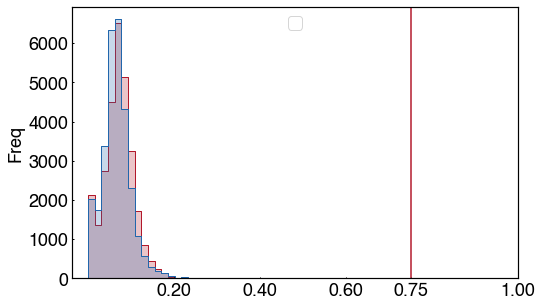

In [28]:
plt.figure(figsize=(8,5))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=1)
plt.tick_params(which='major',width=1)

palette = {"ZEA hydrolysis": '#b2182b', "OTA hydrolysis": '#2166ac',  }  

ax = sns.histplot(x='Similarity scores',data=wdf, hue="Biotransformation", palette=palette, 
                  element="step", bins=20) #  labels=["ZEA hydrolysis", "OTA hydrolysis"]

plt.axvline(0.75, color="#b2182b")

ax.legend(fontsize=18, loc=9)
ax.set(xlabel=None)

plt.xticks([0.2, 0.4, 0.6, 0.75, 1.0], fontsize=18)
plt.yticks(fontsize=18)

plt.ylabel("Freq", fontname='Helvetica', fontsize=18)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)


plt.savefig("./figures/Fig_S1_reaction_level.png", dpi=400, bbox_inches = 'tight')

In [29]:
df1 = pd.DataFrame({"Biotransformation": ["Zearalenone"]*len([r[0] for r in  zea_s_lst if r[0] >0.2]), "Similarity scores": [r[0] for r in zea_s_lst if r[0] >0.2]})
df2 = pd.DataFrame({"Biotransformation": ["Ochratoxin A"]*len([r[0] for r in ota_s_lst if r[0] >0.2]), "Similarity scores": [r[0] for r in ota_s_lst if r[0] >0.2]})
df3 = pd.DataFrame({"Biotransformation": ["Vanillin"]*len([r[0] for r in van_s_lst if r[0] >0.2]), "Similarity scores": [r[0] for r in van_s_lst if r[0] >0.2]})
df4 = pd.DataFrame({"Biotransformation": ["Quercetin"]*len([r[0] for r in que_s_lst if r[0] >0.2]), "Similarity scores": [r[0] for r in que_s_lst if r[0] >0.2]})
df5 = pd.DataFrame({"Biotransformation": ["Glutamic acid"]*len([r[0] for r in glu_s_lst if r[0] >0.2]), "Similarity scores": [r[0] for r in glu_s_lst if r[0] >0.2]})

wdf = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)   
wdf.reset_index()
wdf.head()

,Biotransformation,Similarity scores
0,Zearalenone,0.200758
1,Zearalenone,0.200758
2,Zearalenone,0.201439
3,Zearalenone,0.201439
4,Zearalenone,0.202703


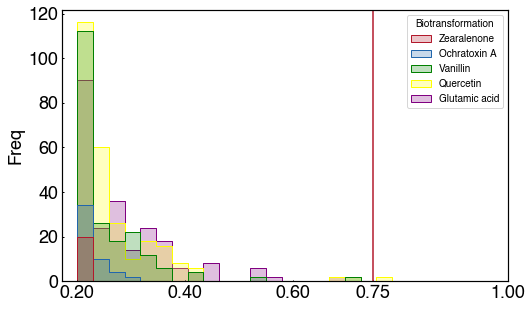

In [30]:
plt.figure(figsize=(8,5))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=1)
plt.tick_params(which='major',width=1)

palette = {"Zearalenone": '#b2182b', "Ochratoxin A": '#2166ac',
           'Vanillin': 'green', "Quercetin": 'yellow', 'Glutamic acid': "purple"}  # green

ax = sns.histplot(x='Similarity scores',data=wdf, hue="Biotransformation", palette=palette, 
                  element="step", bins=20) # , labels=["ZEA hydrolysis", "OTA hydrolysis"]

plt.axvline(0.75, color="#b2182b")

ax.set(xlabel=None)

plt.xticks([0.2, 0.4, 0.6, 0.75, 1.0], fontsize=18)
plt.yticks(fontsize=18)

plt.ylabel("Freq", fontname='Helvetica', fontsize=18)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)


plt.savefig("./figures/Fig_S1_reaction_level_multi_moles.png", dpi=400, bbox_inches = 'tight')

In [31]:
df1 = pd.DataFrame({"Model": ["Zearalenone"]*len(zea_s_lst), "Weights":  [c[0] for c in zea_s_lst]})
df2 = pd.DataFrame({"Model": ["Ochratoxin A"]*len(ota_s_lst), "Weights":  [c[0] for c in ota_s_lst]})
df3 = pd.DataFrame({"Model": ["Vanillin"]*len(van_s_lst), "Weights":  [c[0] for c in van_s_lst]})
df4 = pd.DataFrame({"Model": ["Quercetin"]*len(que_s_lst), "Weights":  [c[0] for c in que_s_lst]})
df5 = pd.DataFrame({"Model": ["Glutamic acid"]*len(glu_s_lst), "Weights":  [c[0] for c in glu_s_lst]})
wdf2 = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)     
wdf2.reset_index()
wdf2.head()

,Model,Weights
0,Zearalenone,0.0
1,Zearalenone,0.0
2,Zearalenone,0.0
3,Zearalenone,0.0
4,Zearalenone,0.0


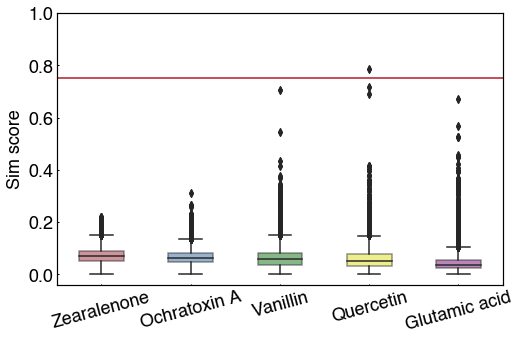

In [32]:
plt.figure(figsize=(8.0,5))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=1)
plt.tick_params(which='major',width=1)
palette = {"Zearalenone": '#b2182b', "Ochratoxin A": '#2166ac',
           'Vanillin': 'green', "Quercetin": 'yellow', 'Glutamic acid': "purple"}  # green
ax = sns.boxplot(data=wdf2, x="Model", y="Weights", order = ["Zearalenone", "Ochratoxin A", "Vanillin", "Quercetin", "Glutamic acid"],
    palette=palette, showfliers=True, linewidth=1.5, width=0.5, boxprops=dict(alpha=0.5))  # boxprops=dict(alpha=1.0)

ax.set(xlabel=None)

plt.rcParams['font.family'] = 'Helvetica'
plt.ylabel("Sim score", fontname='Helvetica', fontsize=18)

plt.axhline(0.75, color="#b2182b")

plt.xticks(fontsize=18, rotation=15)
plt.yticks(fontsize=18)
plt.yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0], fontsize=18)

ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)

plt.savefig("./figures/Fig_S1_box_muliti_moles_reactions.png", dpi=400, bbox_inches = 'tight')

In [33]:
df1 = pd.DataFrame({"Model": ["ZEA hydrolysis"]*len(zea_s_lst), "Weights":  [c[0] for c in zea_s_lst]})
df2 = pd.DataFrame({"Model": ["OTA hydrolysis"]*len(ota_s_lst), "Weights":  [c[0] for c in ota_s_lst]})
df2 = pd.DataFrame({"Model": ["OTA hydrolysis"]*len(ota_s_lst), "Weights":  [c[0] for c in ota_s_lst]})
df2 = pd.DataFrame({"Model": ["OTA hydrolysis"]*len(ota_s_lst), "Weights":  [c[0] for c in ota_s_lst]})
df2 = pd.DataFrame({"Model": ["OTA hydrolysis"]*len(ota_s_lst), "Weights":  [c[0] for c in ota_s_lst]})

wdf2 = pd.concat([df1, df2], ignore_index=True)     

wdf2.reset_index()
wdf2.head()

,Model,Weights
0,ZEA hydrolysis,0.0
1,ZEA hydrolysis,0.0
2,ZEA hydrolysis,0.0
3,ZEA hydrolysis,0.0
4,ZEA hydrolysis,0.0


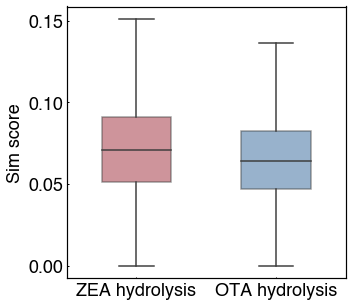

In [34]:
plt.figure(figsize=(5.0,5))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=1)
plt.tick_params(which='major',width=1)
palette = {"ZEA hydrolysis": '#b2182b', "OTA hydrolysis": '#2166ac'}

ax = sns.boxplot(data=wdf2, x="Model", y="Weights", order = ["ZEA hydrolysis", "OTA hydrolysis"],
    palette=palette, showfliers=False, linewidth=1.5, width=0.5, boxprops=dict(alpha=0.5))  # boxprops=dict(alpha=1.0)

ax.set(xlabel=None)

plt.rcParams['font.family'] = 'Helvetica'
plt.ylabel("Sim score", fontname='Helvetica', fontsize=18)


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yticks([0.0, 0.05, 0.10, 0.15, ], fontsize=18)

ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)

plt.savefig("./figures/Fig_S1_box_ota.png", dpi=400, bbox_inches = 'tight')